<a href="https://colab.research.google.com/github/surajsrivathsa/ovgu_deeplearning/blob/master/Assignment_8_Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Deep Learning programming task

**Assignment 8:** Autoencoders

**Team members:**
1. Sanjeeth Busnur Indushekar: 224133 : sanjeeth.busnur@st.ovgu.de
2. Aditya Dey : 230580 : aditya.dey@st.ovgu.de
3. Suraj Shashidhar: 230052 : suraj.shashidhar@st.ovgu.de

**Experiments**

1. **Simple MLP Based Autoencoders**

a) Activations: Sigmoid, ReLU, Tanh

b) Loss Functions used: Mean squared error, binary cross entropy

2. **Convolutional Autoencoders**

a) Use any number of filters and layers, While decoding last layer must have same filters as input image. Conv2DTranspose is the layer at decoder.

b) With Upsampling at decoder.

c) With FC layer at encoder.

3. **Model interpretation (Use MNSIT for interpretability)**

a) Display filters

b) Changing the encoder states manually and output the image. Analyze it.


4. **Unsupervised Pretraining**

a) Train autoencoder – freeze encoder – train classifier on top (as described above).

b) Train autoencoder – train classifier on top of encoder. Do not freeze the encoder, i.e. the encoder is “fine-tuned” on the labeled subset of data as well.

c) Train a classifier directly on the labeled subset; no pretraining. For fairness, it should have the same architecture as the encoder + classifier above.




In [0]:
import os
%tensorflow_version 2.x
import tensorflow as tf
from sklearn import preprocessing
from google.colab import files
from google.colab import drive
import matplotlib.pyplot as plt
import pandas as pd
import copy
import numpy as np

In [3]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from tensorflow.keras import datasets, layers, models
from tensorflow.keras import initializers
from datasets import MNISTDataset

Using TensorFlow backend.


In [0]:
files.upload()

Saving datasets.py to datasets.py


{'datasets.py': b'import numpy as np\n\n\nclass MNISTDataset:\n    """\'Bare minimum\' class to wrap MNIST numpy arrays into a dataset."""\n    def __init__(self, train_imgs, train_lbs, test_imgs, test_lbls, batch_size,\n                 to01=True, shuffle=True, seed=None):\n        """\n        Use seed optionally to always get the same shuffling (-> reproducible\n        results).\n        """\n        self.batch_size = batch_size\n        self.train_data = train_imgs\n        self.train_labels = train_lbs.astype(np.int32)\n        self.test_data = test_imgs\n        self.test_labels = test_lbls.astype(np.int32)\n\n        if to01:\n            # int in [0, 255] -> float in [0, 1]\n            self.train_data = self.train_data.astype(np.float32) / 255\n            self.test_data = self.test_data.astype(np.float32) / 255\n\n        self.size = self.train_data.shape[0]\n\n        if seed:\n            np.random.seed(seed)\n        if shuffle:\n            self.shuffle_train()\n        

In [4]:
  print(os.getcwd())
  print(tf.__version__)

/content
2.2.0


In [0]:
drive.mount('/content/drive')

In [5]:

path = '.'
 
files = os.listdir(path)
for name in files:
    print(name)

.config
__pycache__
datasets.py
sample_data


# **Data Preprocessing**

11493376/11490434 [==============================] - 0s 0us/step
[0 4 1 9 2 1 3 1 4]


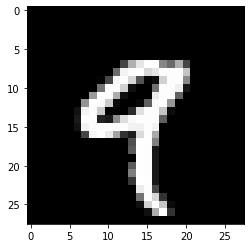

In [6]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
plt.imshow(train_images[4], cmap="Greys_r")
print(train_labels[1:10])

#Normalizing images
train_images = train_images / 255.0

test_images = test_images / 255.0

In [7]:
flattened_data = MNISTDataset(train_images.reshape([-1, 784]), train_labels, 
                    test_images.reshape([-1, 784]), test_labels,
                    batch_size=128)
print(train_images.reshape([-1, 784]).shape)
train_images_flattened = train_images.reshape([-1, 784])
test_images_flattened = test_images.reshape([-1, 784])

(60000, 784)


In [8]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


# **Simple MLP Autoencoders**

1) Using Mean squared error with relu, tanh and sigmoid

2) Used binary cross entropy with sigmoid

Summary:

In [0]:
def create_mlp_model(input_shape=(28, 28), layer_dims=[256,128,64,32,64,128,256,784],output_activation="sigmoid",hidden_activation="relu"):
  model = keras.Sequential([keras.layers.Flatten(input_shape=input_shape)])
  #Loop till penultimate layer that is the penultimate decoder
  for i in range (len(layer_dims)-1):
    model.add(tf.keras.layers.Dense(units=layer_dims[i],activation=hidden_activation))
  
  #Add the output at end
  model.add(tf.keras.layers.Dense(units=layer_dims[-1],activation=output_activation)) 
  return model;



In [0]:
model_relu = create_mlp_model(input_shape=(28, 28), layer_dims=[256,128,64,32,64,128,256,784],output_activation="sigmoid",hidden_activation="relu")
model_sigmoid = create_mlp_model(input_shape=(28, 28), layer_dims=[256,128,64,32,64,128,256,784],output_activation="sigmoid",hidden_activation="sigmoid")
model_tanh = create_mlp_model(input_shape=(28, 28), layer_dims=[256,128,64,32,64,128,256,784],output_activation="sigmoid",hidden_activation="tanh")
model_linear = create_mlp_model(input_shape=(28, 28), layer_dims=[256,128,64,32,64,128,256,784],output_activation="sigmoid",hidden_activation="linear")


In [0]:
model_linear2 = create_mlp_model(input_shape=(28, 28), layer_dims=[256,128,64,32,64,128,256,784],output_activation="linear",hidden_activation="sigmoid")

In [0]:
model_linear3 = create_mlp_model(input_shape=(28, 28), layer_dims=[256,128,64,32,64,128,256,784],output_activation="linear",hidden_activation="relu")

In [0]:
model_relu2 = create_mlp_model(input_shape=(28, 28), layer_dims=[256,128,64,32,64,128,256,784],output_activation="sigmoid",hidden_activation="relu")

In [0]:
#Printing model summary to initial check
model_relu.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_75 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_76 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_77 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_78 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_79 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_80 (Dense)             (None, 128)             

In [0]:
def compile_mlp_model(model,loss="MAE", metrics=["accuracy"], optimizer = "adam"):
  if(loss == "MAE"):
    model.compile(optimizer=optimizer, loss=tf.keras.losses.MAE, metrics=metrics)
  elif (loss == "MSQE"):
    model.compile(optimizer=optimizer, loss=tf.keras.losses.mean_squared_error, metrics=metrics)
  else:
    model.compile(optimizer=optimizer, loss=tf.keras.losses.binary_crossentropy, metrics=metrics)


In [0]:

compile_mlp_model(model_linear, loss = "MSQE", metrics=["accuracy", tf.keras.metrics.FalseNegatives(), tf.keras.metrics.FalsePositives()])
compile_mlp_model(model_tanh, loss = "MSQE", metrics=["accuracy", tf.keras.metrics.FalseNegatives(), tf.keras.metrics.FalsePositives()])
compile_mlp_model(model_sigmoid, loss = "MSQE", metrics=["accuracy", tf.keras.metrics.FalseNegatives(), tf.keras.metrics.FalsePositives()])
compile_mlp_model(model_relu, loss = "MSQE", metrics=["accuracy", tf.keras.metrics.FalseNegatives(), tf.keras.metrics.FalsePositives()])


In [0]:
compile_mlp_model(model_linear2, loss = "MSQE", metrics=["accuracy"])

In [0]:
compile_mlp_model(model_linear2, loss = "MSQE", metrics=["accuracy"])

In [0]:
compile_mlp_model(model_linear3, loss = "MSQE", metrics=["accuracy"])

In [0]:
compile_mlp_model(model_sigmoid, loss = "MSQE", metrics=["accuracy", tf.keras.metrics.FalseNegatives(), tf.keras.metrics.FalsePositives()])

In [0]:
compile_mlp_model(model_relu2, metrics=["accuracy"])

In [0]:
model_linear2.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_115 (Dense)            (None, 256)               200960    
_________________________________________________________________
dense_116 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_117 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_118 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_119 (Dense)            (None, 64)                2112      
_________________________________________________________________
dense_120 (Dense)            (None, 128)             

In [0]:
model_relu2.fit(train_images, train_images_flattened,  epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 33.2768 - accuracy: 0.0148
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 33.2867 - accuracy: 0.0140
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 33.2887 - accuracy: 0.0139
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 33.2864 - accuracy: 0.0145
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 33.2914 - accuracy: 0.0120
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 33.2915 - accuracy: 0.0121
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 33.2915 - accuracy: 0.0121
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 33.2915 - accuracy: 0.0121
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 33.2915 - accuracy: 0.0121
Epoch 10/10
1875/1875 [==============================] - 11s 6ms

In [0]:
model_linear3.fit(train_images, train_images_flattened,  epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 1702.9707 - accuracy: 0.0105
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 1137.7051 - accuracy: 0.0115
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 1016.9025 - accuracy: 0.0133
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 952.8574 - accuracy: 0.0125
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 909.0300 - accuracy: 0.0131
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 879.6067 - accuracy: 0.0127
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 855.2213 - accuracy: 0.0121
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 837.8210 - accuracy: 0.0124
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 821.3605 - accuracy: 0.0127
Epoch 10/10
1875/1875 [=============================

In [0]:
model_linear2.fit(train_images, train_images_flattened,  epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 4604.4775 - accuracy: 0.0137
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 4374.1289 - accuracy: 0.0146
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 4350.4541 - accuracy: 0.0127
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 4157.1177 - accuracy: 0.0116
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 3947.8176 - accuracy: 0.0113
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 3832.3359 - accuracy: 0.0114
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 3754.3936 - accuracy: 0.0116
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 3697.3875 - accuracy: 0.0123
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 3639.0488 - accuracy: 0.0146
Epoch 10/10
1875/1875 [=======================

In [0]:
model_linear.fit(train_images, train_images_flattened,  epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 7221.9443 - accuracy: 0.0000e+00 - false_negatives: 794109.0000 - false_positives: 13219973.0000
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 7221.9478 - accuracy: 0.0000e+00 - false_negatives: 794109.0000 - false_positives: 13219973.0000
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 7221.9409 - accuracy: 0.0000e+00 - false_negatives: 794109.0000 - false_positives: 13219971.0000
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 7221.9443 - accuracy: 0.0000e+00 - false_negatives: 794112.0000 - false_positives: 13219956.0000
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 7222.0732 - accuracy: 0.0000e+00 - false_negatives: 813141.0000 - false_positives: 13184653.0000
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 7222.2314 - accuracy: 0.0000e+00 - false_negatives: 8

In [21]:
model_relu.fit(train_images, train_images_flattened,  epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0309 - accuracy: 0.0103 - false_negatives_3: 3736640.0000 - false_positives_3: 453538.0000
Epoch 2/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0173 - accuracy: 0.0105 - false_negatives_3: 3030544.0000 - false_positives_3: 180712.0000
Epoch 3/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0143 - accuracy: 0.0100 - false_negatives_3: 2931204.0000 - false_positives_3: 128835.0000
Epoch 4/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0126 - accuracy: 0.0114 - false_negatives_3: 2878755.0000 - false_positives_3: 101436.0000
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0114 - accuracy: 0.0123 - false_negatives_3: 2848355.0000 - false_positives_3: 83874.0000
Epoch 6/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0106 - accuracy: 0.0131 - false_negatives_3: 2830101.0000 - false_positi

In [0]:
model_sigmoid.fit(train_images, train_images_flattened,  epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 7217.2334 - accuracy: 0.0026 - false_negatives_2: 18343.0000 - false_positives_2: 22896954.0000
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 7217.0522 - accuracy: 0.0032 - false_negatives_2: 10986.0000 - false_positives_2: 23037136.0000
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 7217.0483 - accuracy: 0.0032 - false_negatives_2: 10748.0000 - false_positives_2: 23054412.0000
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 7217.0522 - accuracy: 0.0031 - false_negatives_2: 11118.0000 - false_positives_2: 22959520.0000
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 7217.0483 - accuracy: 0.0029 - false_negatives_2: 11061.0000 - false_positives_2: 22926828.0000
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 7217.0527 - accuracy: 0.0026 - false_negatives_2: 11475.00

In [0]:
model_tanh.fit(train_images, train_images_flattened,  epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 7217.2412 - accuracy: 9.3333e-04 - false_negatives_1: 19685.0000 - false_positives_1: 22893664.0000
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 7217.0596 - accuracy: 0.0019 - false_negatives_1: 10933.0000 - false_positives_1: 23016404.0000
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 7217.0474 - accuracy: 0.0032 - false_negatives_1: 10644.0000 - false_positives_1: 23035794.0000
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 7217.0308 - accuracy: 0.0021 - false_negatives_1: 10113.0000 - false_positives_1: 22167686.0000
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 7217.0137 - accuracy: 0.0018 - false_negatives_1: 9544.0000 - false_positives_1: 21443900.0000
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 7216.9995 - accuracy: 0.0049 - false_negatives_1: 9934.

In [22]:
def evaluate_and_output_model(model, test_labels, test_images, reshape_matrix = [-1, 784], image_matrix=[10000,28,28], images_to_be_compared=5):
  class_names = ['0', '1', '2', '3', '4','5', '6', '7', '8', '9']
  print(test_images.shape)
  #test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
  print(test_images.shape)
  #print('\n  Relu Test accuracy:', str(test_acc) + " test loss: " + str(test_loss) + "\n")
  test_output_model = model.predict(test_images)
  model_output_images = test_output_model.reshape(image_matrix)
  print(model_output_images.shape)
  plt.figure(figsize=(10,10))
  j = -1
  for i in range(25):
      plt.subplot(5,5,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      j = j+1
      if(i%2 == 0):
        plt.imshow(test_images[i+10], cmap=plt.cm.binary)
      elif(j%2 == 1):
        
        plt.imshow(model_output_images[j-1+10], cmap="Greys_r")
      
      #plt.xlabel(class_names[test_images[i]])
  plt.show()


"""
test_loss, test_acc = model.evaluate(test_images.reshape([-1, 784]),  test_labels, verbose=2)
test_output_model = model.predict(test_images.reshape([-1, 784]),)
model_output_images = test_output_model.reshape([10000,28,28])
plt.imshow(model2_output_images[7], cmap="Greys_r")
"""

'\ntest_loss, test_acc = model.evaluate(test_images.reshape([-1, 784]),  test_labels, verbose=2)\ntest_output_model = model.predict(test_images.reshape([-1, 784]),)\nmodel_output_images = test_output_model.reshape([10000,28,28])\nplt.imshow(model2_output_images[7], cmap="Greys_r")\n'

(10000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


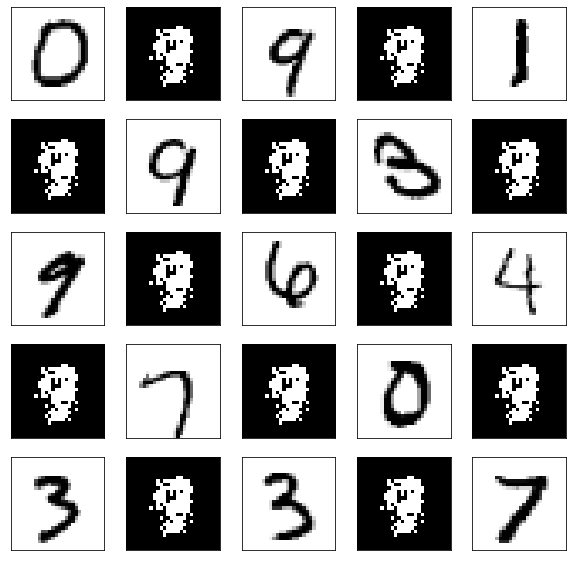

In [0]:
evaluate_and_output_model(model_relu2, test_labels, test_images)

(10000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


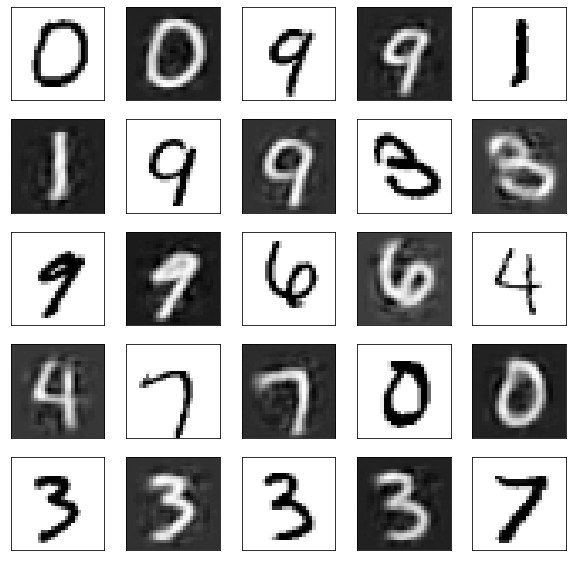

In [0]:
evaluate_and_output_model(model_linear3, test_labels, test_images)

(10000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


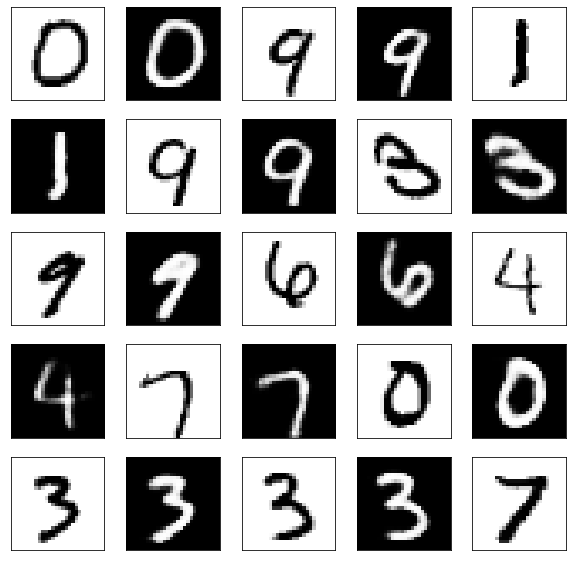

In [23]:
evaluate_and_output_model(model_relu, test_labels, test_images)

(10000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


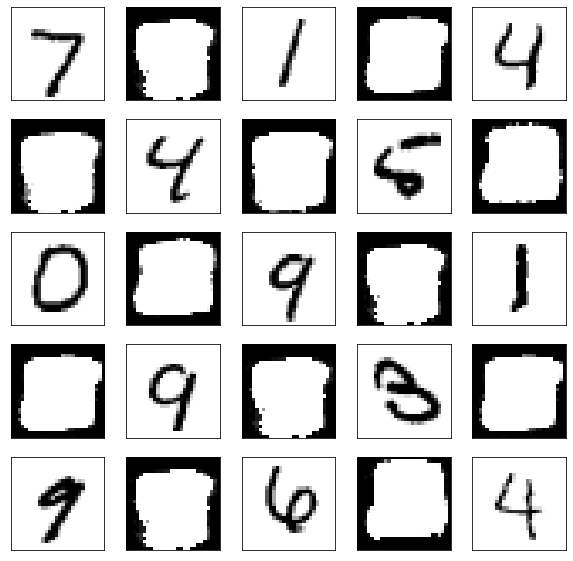

In [0]:
evaluate_and_output_model(model_tanh, test_labels, test_images)

(10000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


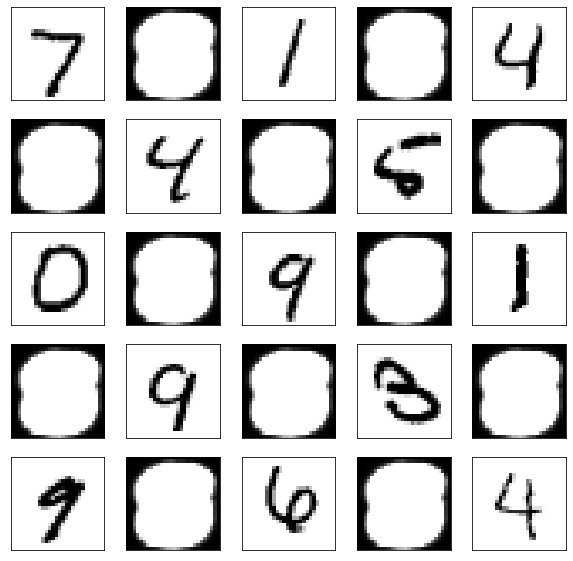

In [0]:
evaluate_and_output_model(model_sigmoid, test_labels, test_images)

(10000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


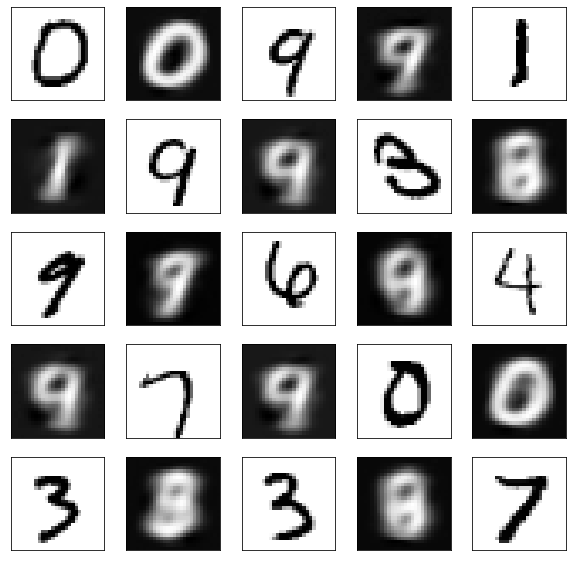

In [0]:
evaluate_and_output_model(model_linear2, test_labels, test_images)

In [0]:
model_relu.save(filepath="/content/model_relu")
model_tanh.save(filepath="/content/model_tanh")
model_sigmoid.save(filepath="/content/model_sigmoid")
model_linear.save(filepath="/content/model_linear")

INFO:tensorflow:Assets written to: /content/model_relu/assets
INFO:tensorflow:Assets written to: /content/model_tanh/assets
INFO:tensorflow:Assets written to: /content/model_sigmoid/assets
INFO:tensorflow:Assets written to: /content/model_linear/assets


In [0]:
!zip -r /content/model_relu.zip /content/model_relu
!zip -r /content/model_tanh.zip /content/model_tanh
!zip -r /content/model_linear.zip /content/model_linear
!zip -r /content/model_sigmoid.zip /content/model_sigmoid

  adding: content/model_relu/ (stored 0%)
  adding: content/model_relu/assets/ (stored 0%)
  adding: content/model_relu/variables/ (stored 0%)
  adding: content/model_relu/variables/variables.index (deflated 69%)
  adding: content/model_relu/variables/variables.data-00000-of-00001 (deflated 32%)
  adding: content/model_relu/saved_model.pb (deflated 89%)
  adding: content/model_tanh/ (stored 0%)
  adding: content/model_tanh/assets/ (stored 0%)
  adding: content/model_tanh/variables/ (stored 0%)
  adding: content/model_tanh/variables/variables.index (deflated 69%)
  adding: content/model_tanh/variables/variables.data-00000-of-00001 (deflated 21%)
  adding: content/model_tanh/saved_model.pb (deflated 90%)
  adding: content/model_linear/ (stored 0%)
  adding: content/model_linear/assets/ (stored 0%)
  adding: content/model_linear/variables/ (stored 0%)
  adding: content/model_linear/variables/variables.index (deflated 70%)
  adding: content/model_linear/variables/variables.data-00000-of-00

In [0]:
model2 = keras.Sequential([
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(256, activation="sigmoid"),
    keras.layers.Dense(784)
])

In [0]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.MAE, #tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [0]:
model2.fit(train_images_flattened, train_images_flattened,  epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 32.2754 - accuracy: 0.0126
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 31.8131 - accuracy: 0.0150
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 31.7963 - accuracy: 0.0149
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 31.7965 - accuracy: 0.0149
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 31.7962 - accuracy: 0.0148
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 31.7962 - accuracy: 0.0150
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 31.7963 - accuracy: 0.0149
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 31.7964 - accuracy: 0.0152
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 31.7963 - accuracy: 0.0150
Epoch 10/10
1875/1875 [==============================] - 10s 5ms

In [0]:
test_loss, test_acc = model_linear.evaluate(test_images,  test_labels, verbose=2)

print('\n  Relu Test accuracy:', str(test_acc) + " test loss: " + str(test_loss) + "\n")

test_loss, test_acc = model_relu.evaluate(test_images,  test_images, verbose=2)

print('\n Sigmoid Test accuracy:', str(test_acc) + " test loss: " + str(test_loss))

In [0]:
test_output_model = model.predict(test_images.reshape([-1, 784]),)
test_output_model2 = model2.predict(test_images.reshape([-1, 784]),)

In [0]:
test_output_model2.shape
#(10000, 28, 28)

(10000, 784)

In [0]:
model2_output_images = test_output_model2.reshape([10000,28,28])
model_output_images = test_output_model.reshape([10000,28,28])

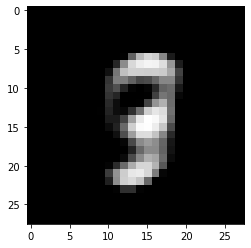

In [0]:
plt.imshow(model2_output_images[7], cmap="Greys_r")
#plt.imshow(test_images.reshape([-1, 784])[7], cmap="Greys_r")

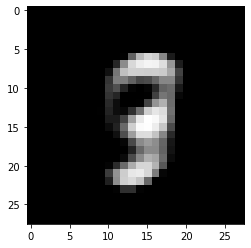

In [0]:
plt.imshow(model2_output_images[12], cmap="Greys_r")

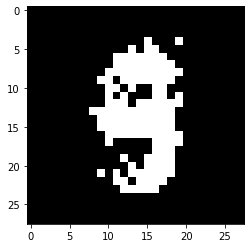

In [0]:
plt.imshow(model_output_images[7], cmap="Greys_r")

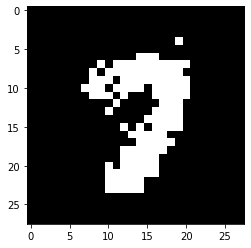

In [0]:
plt.imshow(model_output_images[0], cmap="Greys_r")

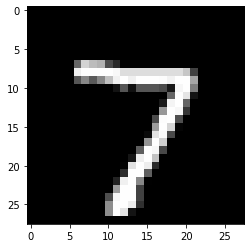

In [0]:
plt.imshow(test_images[0], cmap="Greys_r")

# **Convolutional Autoencoders**

1) Normal Convolution and deconvolution

2) Upscaling

3) Fully connected at the end


In [0]:
(train_images_raw, train_labels_raw), (test_images_raw, test_labels_raw) = mnist.load_data()

train_data = tf.data.Dataset.from_tensor_slices(( train_images_raw.astype(np.float32)/255.0, train_images_raw.astype(np.float32)/255.0 ))

train_data = train_data.shuffle(buffer_size = train_images_raw.shape[0]).batch(32)

#test_data = tf.data.Dataset.from_tensor_slices(( test_images_raw.astype(np.float32)/255.0, test_labels_raw.astype(np.int32) ))
test_data = tf.data.Dataset.from_tensor_slices(( test_images_raw.astype(np.float32)/255.0,  test_images_raw.astype(np.float32)/255.0 ))
test_data = test_data.batch(32)

In [58]:
input_shape = (train_images_raw.shape[1], train_images_raw.shape[2], 1)
print(input_shape)
print(train_images_raw.shape)

(28, 28, 1)
(60000, 28, 28)


In [75]:
def create_model():
  model = models.Sequential()
  model.add(layers.Conv2D(filters = 32, kernel_size=(3, 3), padding = "same", activation=tf.nn.relu,name = "conv_enc1", input_shape = input_shape))
  model.add(layers.MaxPool2D(pool_size=(2,2)))
  model.add(layers.Conv2D(filters = 64, kernel_size=(3, 3), padding = "same", activation = tf.nn.relu, name = "conv_enc2"))
  model.add(layers.MaxPool2D(pool_size=(2,2)))
  model.add(layers.Conv2D(filters = 128, kernel_size=(3, 3),  padding = "same", activation = tf.nn.relu, name = "conv_enc3"))
  model.add(layers.MaxPool2D(pool_size=(2,2)))
  model.add(layers.Conv2D(filters = 64, kernel_size=(1, 1),  padding = "same", activation = tf.nn.relu, name = "conv_compression_dim_reduce"))
  model.add(layers.Conv2DTranspose(filters = 128, kernel_size=(3, 3), strides=(2,2),  activation = tf.nn.relu, name = "conv_dec1"))
  model.add(layers.Conv2DTranspose(filters = 64, kernel_size=(3, 3), strides=(2,2),  padding = "same", activation = tf.nn.relu, name = "conv_dec2"))
  model.add(layers.Conv2DTranspose(filters = 1, kernel_size=(3, 3), strides=(2,2), padding = "same", activation = tf.nn.sigmoid, name = "conv_dec3"))
  print(model.summary())
  return model;

conv_model1 = create_model()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_enc1 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv_enc2 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv_enc3 (Conv2D)           (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 3, 3, 128)         0         
_________________________________________________________________
conv_compression_dim_reduce  (None, 3, 3, 64)        

In [0]:
conv_model1.compile(optimizer="adam", loss=tf.keras.losses.MeanAbsoluteError(), metrics=["accuracy"])

In [77]:
x = tf.expand_dims(train_images_raw.astype(np.float32)/255.0 , -1)
y = tf.expand_dims(train_images_raw.astype(np.float32)/255.0, -1)
print(x.shape)
print(x.dtype)

(60000, 28, 28, 1)
<dtype: 'float32'>


In [72]:
conv_model1.fit(x=x, y=y,  epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 145s 78ms/step - loss: 0.1328 - accuracy: 0.7346
Epoch 2/5
1875/1875 [==============================] - 145s 77ms/step - loss: 0.1307 - accuracy: 0.7429
Epoch 3/5
1875/1875 [==============================] - 146s 78ms/step - loss: 0.1307 - accuracy: 0.7429
Epoch 4/5
1875/1875 [==============================] - 145s 77ms/step - loss: 0.1307 - accuracy: 0.7429
Epoch 5/5
1875/1875 [==============================] - 145s 77ms/step - loss: 0.1307 - accuracy: 0.7430


In [0]:
def evaluate_and_output_model(model, test_images, images_to_be_compared=5):
  class_names = ['0', '1', '2', '3', '4','5', '6', '7', '8', '9']
  print(test_images.shape)
  #test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
  print(test_images.shape)
  #print('\n  Relu Test accuracy:', str(test_acc) + " test loss: " + str(test_loss) + "\n")
  model_output_images = model.predict(test_images)
  print(model_output_images.shape)
  plt.figure(figsize=(10,10))
  j = -1
  for i in range(25):
      plt.subplot(5,5,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      j = j+1
      if(i%2 == 0):
        plt.imshow(test_images[i+10], cmap=plt.cm.binary)
      elif(j%2 == 1):
        
        plt.imshow(model_output_images[j-1+10], cmap="Greys_r")
      
      #plt.xlabel(class_names[test_images[i]])
  plt.show()

(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 3)


TypeError: ignored

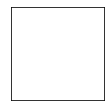

In [74]:
evaluate_and_output_model(conv_model1, tf.expand_dims(test_images_raw.astype(np.float32)/255.0, -1))

In [0]:
# Instantiate an optimizer.
optimizer = keras.optimizers.Adam(learning_rate=  2 * 1e-3)
# Instantiate a loss function.
loss_fn = keras.losses.MeanAbsoluteError

# Prepare the metrics.
train_acc_metric = keras.metrics.Accuracy()
val_acc_metric = keras.metrics.Accuracy()

In [0]:
conv_model1.fit(train_data,epochs=5,)

In [0]:
epochs=5
for epoch in range(epochs):
  print("===== epoch number: {}".format(epoch))

  for step, (x_batch_train, y_batch_train) in enumerate(train_data):

    with tf.GradientTape() as tape:
      image_from_decoder = conv_model1(x_batch_train, training=True)
      
      loss_value = loss_fn(y_batch_train, image_from_decoder)

    grads = tape.gradient(loss_value, conv_model1.trainable_weights)
    optimizer.apply_gradients(zip(grads, conv_model1.trainable_weights))

    # Update training metric.
    #train_acc_metric(y_batch_train, logits)

    # Log every 200 batches.
    if step % 500 == 0:
        print('Training loss (for one batch) at step %s: %s' % (step, float(loss_value)))
        print('Seen so far: %s samples' % ((step + 1) * 64))

  # Display metrics at the end of each epoch.
  #train_acc = train_acc_metric.result()
  #print('Training acc over epoch: %s' % (float(train_acc),))
  # Reset training metrics at the end of each epoch
  #train_acc_metric.reset_states()

  for x_batch_val, y_batch_val in test_data:
    val_image_from_decoder = model(x_batch_val)
    # Update val metrics
    #val_acc_metric(y_batch_val, val_logits)
  #val_acc = val_acc_metric.result()
  #val_acc_metric.reset_states()
  #print('Validation acc: %s' % (float(val_acc),))

# **Basic CNN on MNSIT**

In [0]:
mnist = tf.keras.datasets.mnist
(train_images_raw, train_labels_raw), (test_images_raw, test_labels_raw) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
5


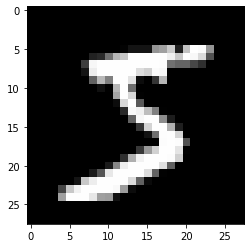

In [0]:
print(train_images_raw.shape)
print(train_labels_raw.shape)
print(test_images_raw.shape)
print(test_labels_raw.shape)
print(train_labels_raw[0])
plt.imshow(train_images_raw[0], cmap="Greys_r")

In [0]:
train_data = tf.data.Dataset.from_tensor_slices(( train_images_raw.astype(np.float32)/255.0, train_labels_raw.astype(np.int32) ))

train_data = train_data.shuffle(buffer_size = train_images_raw.shape[0]).batch(32)

test_data = tf.data.Dataset.from_tensor_slices(( test_images_raw.astype(np.float32)/255.0, test_labels_raw.astype(np.int32) ))

test_data = test_data.batch(32)

In [0]:
input_shape = (train_images_raw.shape[1], train_images_raw.shape[2], 1)
print(input_shape)

(28, 28, 1)


In [0]:
model = models.Sequential()
model.add(layers.Conv2D(filters = 32, kernel_size=(3, 3), padding = "valid", activation=tf.nn.relu,name = "conv_1", input_shape = input_shape))
model.add(layers.Conv2D(filters = 64, kernel_size=(3, 3), padding = "valid", activation = tf.nn.relu, name = "conv_2"))
model.add(layers.MaxPool2D(pool_size=(2, 2), name = "maxpool_2"))
model.add(layers.Conv2D(filters = 128, kernel_size=(3, 3), padding = "valid", activation = tf.nn.relu, name = "conv_3"))
model.add(layers.MaxPool2D(pool_size=(2, 2), name = "maxpool_3"))
model.add(layers.Flatten())
#model.add(layers.Dense(128, activation=tf.nn.relu))
model.add(layers.Dense(64, activation=tf.nn.relu))
model.add(layers.Dense(10))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv_2 (Conv2D)              (None, 24, 24, 64)        18496     
_________________________________________________________________
maxpool_2 (MaxPooling2D)     (None, 12, 12, 64)        0         
_________________________________________________________________
conv_3 (Conv2D)              (None, 10, 10, 128)       73856     
_________________________________________________________________
maxpool_3 (MaxPooling2D)     (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                2

In [0]:
# Instantiate an optimizer.
optimizer = keras.optimizers.Adam(learning_rate=  5 * 1e-3)
# Instantiate a loss function.
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Prepare the metrics.
train_acc_metric = keras.metrics.SparseCategoricalAccuracy()
val_acc_metric = keras.metrics.SparseCategoricalAccuracy()

In [0]:
epochs=5
for epoch in range(epochs):
  print("===== epoch number: {}".format(epoch))

  for step, (x_batch_train, y_batch_train) in enumerate(train_data):

    with tf.GradientTape() as tape:
      logits = model(x_batch_train, training=True)
      
      loss_value = loss_fn(y_batch_train, logits)

    grads = tape.gradient(loss_value, model.trainable_weights)
    optimizer.apply_gradients(zip(grads, model.trainable_weights))

    # Update training metric.
    train_acc_metric(y_batch_train, logits)

    # Log every 200 batches.
    if step % 500 == 0:
        print('Training loss (for one batch) at step %s: %s' % (step, float(loss_value)))
        print('Seen so far: %s samples' % ((step + 1) * 64))

  # Display metrics at the end of each epoch.
  train_acc = train_acc_metric.result()
  print('Training acc over epoch: %s' % (float(train_acc),))
  # Reset training metrics at the end of each epoch
  train_acc_metric.reset_states()

  for x_batch_val, y_batch_val in test_data:
    val_logits = model(x_batch_val)
    # Update val metrics
    val_acc_metric(y_batch_val, val_logits)
  val_acc = val_acc_metric.result()
  val_acc_metric.reset_states()
  print('Validation acc: %s' % (float(val_acc),))

  

===== epoch number: 0
Training loss (for one batch) at step 0: 2.3072452545166016
Seen so far: 64 samples
Training loss (for one batch) at step 500: 0.03027668595314026
Seen so far: 32064 samples
Training loss (for one batch) at step 1000: 0.046704329550266266
Seen so far: 64064 samples
Training loss (for one batch) at step 1500: 0.035739678889513016
Seen so far: 96064 samples
Training acc over epoch: 0.9650499820709229
Validation acc: 0.9810000061988831
===== epoch number: 1
Training loss (for one batch) at step 0: 0.08412780612707138
Seen so far: 64 samples
Training loss (for one batch) at step 500: 0.008991340175271034
Seen so far: 32064 samples
Training loss (for one batch) at step 1000: 0.018697133287787437
Seen so far: 64064 samples
Training loss (for one batch) at step 1500: 0.0009454537066631019
Seen so far: 96064 samples
Training acc over epoch: 0.9839666485786438
Validation acc: 0.9861000180244446
===== epoch number: 2
Training loss (for one batch) at step 0: 0.05947175249457

Conclusion: Using CNN based models, we were able to achieve a test accuracy of 98.9% compared to Just MLP based models where we achieved around 97% results for around same number of parameters [250k-300k]





# **Basic CNN on Zalando**

In [0]:
def run_model(epochs, model, loss_fn, optimizer, train_acc_metric, val_acc_metric, train_data=train_data, test_data=test_data):

  for epoch in range(epochs):
    print("===== epoch number: {}".format(epoch))

    for step, (x_batch_train, y_batch_train) in enumerate(train_data):

      with tf.GradientTape() as tape:
        logits = model(x_batch_train, training=True)
        
        loss_value = loss_fn(y_batch_train, logits)

      grads = tape.gradient(loss_value, model.trainable_weights)
      optimizer.apply_gradients(zip(grads, model.trainable_weights))

      # Update training metric.
      train_acc_metric(y_batch_train, logits)

      # Log every 200 batches.
      if step % 500 == 0:
          print('Training loss (for one batch) at step %s: %s' % (step, float(loss_value)))
          print('Seen so far: %s samples' % ((step + 1) * 64))

    # Display metrics at the end of each epoch.
    train_acc = train_acc_metric.result()
    print('Training acc over epoch: %s' % (float(train_acc),))
    # Reset training metrics at the end of each epoch
    train_acc_metric.reset_states()

    for x_batch_val, y_batch_val in test_data:
      val_logits = model(x_batch_val)
      # Update val metrics
      val_acc_metric(y_batch_val, val_logits)
    val_acc = val_acc_metric.result()
    val_acc_metric.reset_states()
    print('Validation acc: %s' % (float(val_acc),))

In [0]:
mnist = tf.keras.datasets.fashion_mnist
(train_images_raw, train_labels_raw), (test_images_raw, test_labels_raw) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
9


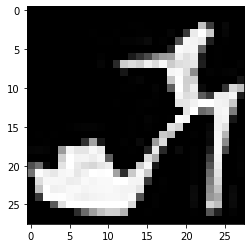

In [0]:
print(train_images_raw.shape)
print(train_labels_raw.shape)
print(test_images_raw.shape)
print(test_labels_raw.shape)
print(train_labels_raw[0])
plt.imshow(train_images_raw[9], cmap="Greys_r")

In [0]:
train_data = tf.data.Dataset.from_tensor_slices(( train_images_raw.astype(np.float32)/255.0, train_labels_raw.astype(np.int32) ))

train_data = train_data.shuffle(buffer_size = train_images_raw.shape[0]).batch(512)

test_data = tf.data.Dataset.from_tensor_slices(( test_images_raw.astype(np.float32)/255.0, test_labels_raw.astype(np.int32) ))

test_data = test_data.batch(512)

In [0]:
input_shape = (train_images_raw.shape[1], train_images_raw.shape[2], 1)
print(input_shape)

(28, 28, 1)


In [0]:
model = models.Sequential()
model.add(layers.Conv2D(filters = 32, kernel_size=(3, 3), padding = "valid", activation=tf.nn.relu,name = "conv_1", input_shape = input_shape))
model.add(layers.Conv2D(filters = 64, kernel_size=(3, 3), padding = "valid", activation = tf.nn.relu, name = "conv_2"))
model.add(layers.MaxPool2D(pool_size=(2, 2), name = "maxpool_2"))
model.add(layers.Conv2D(filters = 128, kernel_size=(3, 3), padding = "valid", activation = tf.nn.relu, name = "conv_3"))
model.add(layers.MaxPool2D(pool_size=(2, 2), name = "maxpool_3"))
model.add(layers.Flatten())
#model.add(layers.Dense(128, activation=tf.nn.relu))
model.add(layers.Dense(64, activation=tf.nn.relu))
model.add(layers.Dense(10))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv_2 (Conv2D)              (None, 24, 24, 64)        18496     
_________________________________________________________________
maxpool_2 (MaxPooling2D)     (None, 12, 12, 64)        0         
_________________________________________________________________
conv_3 (Conv2D)              (None, 10, 10, 128)       73856     
_________________________________________________________________
maxpool_3 (MaxPooling2D)     (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [0]:
# Instantiate an optimizer.
optimizer = keras.optimizers.Adam(learning_rate=  5 * 1e-3)
# Instantiate a loss function.
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Prepare the metrics.
train_acc_metric = keras.metrics.SparseCategoricalAccuracy()
val_acc_metric = keras.metrics.SparseCategoricalAccuracy()

In [0]:
run_model(epochs = 5, model=model, loss_fn = loss_fn, optimizer = optimizer, train_acc_metric = train_acc_metric, 
          val_acc_metric = val_acc_metric, train_data=train_data, test_data=test_data)

===== epoch number: 0
Training loss (for one batch) at step 0: 2.306023597717285
Seen so far: 64 samples
Training acc over epoch: 0.7584166526794434
Validation acc: 0.8259999752044678
===== epoch number: 1
Training loss (for one batch) at step 0: 0.4642285108566284
Seen so far: 64 samples
Training acc over epoch: 0.8793666958808899
Validation acc: 0.8794999718666077
===== epoch number: 2
Training loss (for one batch) at step 0: 0.3265358507633209
Seen so far: 64 samples
Training acc over epoch: 0.900950014591217
Validation acc: 0.9028000235557556
===== epoch number: 3
Training loss (for one batch) at step 0: 0.23854142427444458
Seen so far: 64 samples
Training acc over epoch: 0.9156333208084106
Validation acc: 0.9032999873161316
===== epoch number: 4
Training loss (for one batch) at step 0: 0.21546828746795654
Seen so far: 64 samples
Training acc over epoch: 0.9228333234786987
Validation acc: 0.9047999978065491


On Zalando dataset, using existing models we have achieved almost the same accuracy as we achieved during MLP. However, In CNN this metric can increase if we add more layers and tune the model

# **Basic CNN on CIFAR-10**

Summary: Used VGG-16 style based approach to get Test accuracy of 84% was reached after using batchout and dropout regularization techniques. Even though overfitting was not prevented completely

Without these test accuracy stays < 75% and results in severe overfit

In [0]:
def run_model(epochs, model, loss_fn, optimizer, train_acc_metric, val_acc_metric, train_data, test_data):

  for epoch in range(epochs):
    print("===== epoch number: {}".format(epoch))

    for step, (x_batch_train, y_batch_train) in enumerate(train_data):

      with tf.GradientTape() as tape:
        logits = model(x_batch_train, training=True)
        
        loss_value = loss_fn(y_batch_train, logits)

      grads = tape.gradient(loss_value, model.trainable_weights)
      optimizer.apply_gradients(zip(grads, model.trainable_weights))

      # Update training metric.
      train_acc_metric(y_batch_train, logits)

      # Log every 200 batches.
      if step % 500 == 0:
          print('Training loss (for one batch) at step %s: %s' % (step, float(loss_value)))
          print('Seen so far: %s samples' % ((step + 1) * 64))

    # Display metrics at the end of each epoch.
    train_acc = train_acc_metric.result()
    print('Training acc over epoch: %s' % (float(train_acc),))
    # Reset training metrics at the end of each epoch
    train_acc_metric.reset_states()

    for x_batch_val, y_batch_val in test_data:
      val_logits = model(x_batch_val)
      # Update val metrics
      val_acc_metric(y_batch_val, val_logits)
    val_acc = val_acc_metric.result()
    val_acc_metric.reset_states()
    print('Validation acc: %s' % (float(val_acc),))

In [0]:
mnist = tf.keras.datasets.cifar10
(train_images_raw, train_labels_raw), (test_images_raw, test_labels_raw) = mnist.load_data()

170500096/170498071 [==============================] - 6s 0us/step


(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)
[6]
[3]


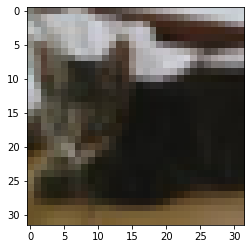

In [0]:
print(train_images_raw.shape)
print(train_labels_raw.shape)
print(test_images_raw.shape)
print(test_labels_raw.shape)
print(train_labels_raw[0])
plt.imshow(train_images_raw[9], cmap="Greys_r")
print(train_labels_raw[9])

In [0]:
train_data = tf.data.Dataset.from_tensor_slices(( train_images_raw.astype(np.float32)/255.0, train_labels_raw.astype(np.int32) ))

train_data = train_data.shuffle(buffer_size = train_images_raw.shape[0]).batch(512).repeat(2)

test_data = tf.data.Dataset.from_tensor_slices(( test_images_raw.astype(np.float32)/255.0, test_labels_raw.astype(np.int32) ))

test_data = test_data.batch(512)

In [0]:
input_shape = (train_images_raw.shape[1], train_images_raw.shape[2], train_images_raw.shape[3])
print(input_shape)

(32, 32, 3)


In [0]:
model = models.Sequential()
#model.add(layers.Conv2D(filters = 16, kernel_size=(1, 1), padding = "valid", activation=tf.nn.relu, name = "conv_1", input_shape = input_shape))
model.add(layers.Conv2D(filters = 64, kernel_size=(3, 3), padding = "same", activation=tf.nn.relu, name = "conv_1a", bias_initializer="glorot_uniform", input_shape = input_shape))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters = 64, kernel_size=(3, 3), padding = "same", activation=tf.nn.relu, name = "conv_1b", kernel_initializer= "he_uniform" ,bias_initializer="glorot_uniform"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2, 2), name = "maxpool_1"))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(filters = 128, kernel_size=(3, 3), padding = "same", activation=tf.nn.relu, name = "conv_2a", bias_initializer="glorot_uniform"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters = 128, kernel_size=(3, 3), padding = "same", activation=tf.nn.relu, name = "conv_2b", kernel_initializer= "he_uniform", bias_initializer="glorot_uniform"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2, 2), name = "maxpool_2"))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(filters = 256, kernel_size=(5, 5), padding = "same", activation=tf.nn.relu, name = "conv_3a", bias_initializer="glorot_uniform"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters = 256, kernel_size=(5, 5), padding = "same", activation=tf.nn.relu, name = "conv_3b", kernel_initializer= "he_uniform", bias_initializer="glorot_uniform"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2, 2), name = "maxpool_3"))
model.add(layers.Dropout(0.4))

model.add(layers.Conv2D(filters = 64, kernel_size=(1, 1), padding = "valid", activation=tf.nn.relu, name = "conv_4", kernel_initializer= "he_uniform", bias_initializer="glorot_uniform"))
model.add(layers.BatchNormalization())
model.add(layers.Flatten())
#model.add(layers.Dense(128, activation=tf.nn.relu))
model.add(layers.Dense(128, activation=tf.nn.relu, bias_initializer="glorot_uniform"))
model.add(layers.Dense(32, activation=tf.nn.relu, bias_initializer="he_uniform"))
model.add(layers.Dense(10))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1a (Conv2D)             (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_28 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
conv_1b (Conv2D)             (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_29 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
maxpool_1 (MaxPooling2D)     (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv_2a (Conv2D)             (None, 16, 16, 128)      

In [0]:
# Instantiate an optimizer.
optimizer = keras.optimizers.Adam(learning_rate=   1.1 * 1e-3)
# Instantiate a loss function.
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Prepare the metrics.
train_acc_metric = keras.metrics.SparseCategoricalAccuracy()
val_acc_metric = keras.metrics.SparseCategoricalAccuracy()

In [0]:
run_model(epochs = 12, model=model, loss_fn = loss_fn, optimizer = optimizer, train_acc_metric = train_acc_metric, 
          val_acc_metric = val_acc_metric, train_data=train_data, test_data=test_data)

===== epoch number: 0
Training loss (for one batch) at step 0: 2.874469041824341
Seen so far: 64 samples
Training acc over epoch: 0.5644099712371826
Validation acc: 0.20909999310970306
===== epoch number: 1
Training loss (for one batch) at step 0: 0.7043288946151733
Seen so far: 64 samples
Training acc over epoch: 0.7630000114440918
Validation acc: 0.38449999690055847
===== epoch number: 2
Training loss (for one batch) at step 0: 0.4888354539871216
Seen so far: 64 samples
Training acc over epoch: 0.8386899828910828
Validation acc: 0.7093999981880188
===== epoch number: 3
Training loss (for one batch) at step 0: 0.3295210003852844
Seen so far: 64 samples
Training acc over epoch: 0.885670006275177
Validation acc: 0.8083999752998352
===== epoch number: 4
Training loss (for one batch) at step 0: 0.20768895745277405
Seen so far: 64 samples
Training acc over epoch: 0.9185799956321716
Validation acc: 0.8201000094413757
===== epoch number: 5
Training loss (for one batch) at step 0: 0.168076634

# **Playing with filter sizes**

Summary

1. Filter sizes of (7, 7) and (5, 5) increased number of parameters to be trained from (3, 3) filter causing longer training time. Also (3,3) filter was able to capture much better information than larger filters as Cifar is comparitively smaller resolution images of 32,32 size. For larger imager(1 Megapixel ==> 1024, 1024) maybe larger filter may be helpful

2. Extremely large filter size of (32, 32) almost the size of the image. This ballooned up the number of parameters to be trained to around 6 million and gave really poor results than smaller filter. (32, 32) filters are trying to capture patterns that are too complex and non-sharable between different parts of image. Hence learnt parameters are not reused for other parts of the image causing this failure.

3. Extremely small filter (1, 1) as first convolution layer of 256 filters. it resulted in really less paramters and also it could be used to reduce number of channels hence number of params to be trained. Helpful before handing data over from Convolution to dense layer. As expected a single pixel is too general and caused failure while testing. As expected it underfits achieveing around 50% on test data, but muich better than option 2

In [0]:
def run_model(epochs, model, loss_fn, optimizer, train_acc_metric, val_acc_metric, train_data, test_data):

  for epoch in range(epochs):
    print("===== epoch number: {}".format(epoch))

    for step, (x_batch_train, y_batch_train) in enumerate(train_data):

      with tf.GradientTape() as tape:
        logits = model(x_batch_train, training=True)
        
        loss_value = loss_fn(y_batch_train, logits)

      grads = tape.gradient(loss_value, model.trainable_weights)
      optimizer.apply_gradients(zip(grads, model.trainable_weights))

      # Update training metric.
      train_acc_metric(y_batch_train, logits)

      # Log every 200 batches.
      if step % 500 == 0:
          print('Training loss (for one batch) at step %s: %s' % (step, float(loss_value)))
          print('Seen so far: %s samples' % ((step + 1) * 64))

    # Display metrics at the end of each epoch.
    train_acc = train_acc_metric.result()
    print('Training acc over epoch: %s' % (float(train_acc),))
    # Reset training metrics at the end of each epoch
    train_acc_metric.reset_states()

    for x_batch_val, y_batch_val in test_data:
      val_logits = model(x_batch_val)
      # Update val metrics
      val_acc_metric(y_batch_val, val_logits)
    val_acc = val_acc_metric.result()
    val_acc_metric.reset_states()
    print('Validation acc: %s' % (float(val_acc),))

In [0]:
mnist = tf.keras.datasets.cifar10
(train_images_raw, train_labels_raw), (test_images_raw, test_labels_raw) = mnist.load_data()

170500096/170498071 [==============================] - 13s 0us/step


(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)
[6]
[3]


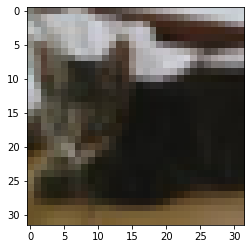

In [0]:
print(train_images_raw.shape)
print(train_labels_raw.shape)
print(test_images_raw.shape)
print(test_labels_raw.shape)
print(train_labels_raw[0])
plt.imshow(train_images_raw[9], cmap="Greys_r")
print(train_labels_raw[9])

In [0]:
input_shape = (train_images_raw.shape[1], train_images_raw.shape[2], train_images_raw.shape[3])
print(input_shape)

(32, 32, 3)


In [0]:
train_data = tf.data.Dataset.from_tensor_slices(( train_images_raw.astype(np.float32)/255.0, train_labels_raw.astype(np.int32) ))

train_data = train_data.shuffle(buffer_size = train_images_raw.shape[0]).batch(1200).repeat(2)

test_data = tf.data.Dataset.from_tensor_slices(( test_images_raw.astype(np.float32)/255.0, test_labels_raw.astype(np.int32) ))

test_data = test_data.batch(512)

In [0]:
model = models.Sequential()
#model.add(layers.Conv2D(filters = 16, kernel_size=(1, 1), padding = "valid", activation=tf.nn.relu, name = "conv_1", input_shape = input_shape))
model.add(layers.Conv2D(filters = 64, kernel_size=(5, 5), padding = "same", activation=tf.nn.relu, name = "conv_1a", bias_initializer="glorot_uniform", input_shape = input_shape))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters = 64, kernel_size=(5, 5), padding = "same", activation=tf.nn.relu, name = "conv_1b", kernel_initializer= "he_uniform" ,bias_initializer="glorot_uniform"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2, 2), name = "maxpool_1"))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(filters = 128, kernel_size=(7, 7), padding = "same", activation=tf.nn.relu, name = "conv_2a", bias_initializer="glorot_uniform"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters = 128, kernel_size=(7, 7), padding = "same", activation=tf.nn.relu, name = "conv_2b", kernel_initializer= "he_uniform", bias_initializer="glorot_uniform"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2, 2), name = "maxpool_2"))
model.add(layers.Dropout(0.3))

#model.add(layers.Conv2D(filters = 64, kernel_size=(1, 1), padding = "valid", activation=tf.nn.relu, name = "conv_4", kernel_initializer= "he_uniform", bias_initializer="glorot_uniform"))
#model.add(layers.BatchNormalization())
model.add(layers.Flatten())
#model.add(layers.Dense(128, activation=tf.nn.relu))
model.add(layers.Dense(128, activation=tf.nn.relu, bias_initializer="glorot_uniform"))
model.add(layers.Dense(32, activation=tf.nn.relu, bias_initializer="he_uniform"))
model.add(layers.Dense(10))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1a (Conv2D)             (None, 32, 32, 64)        4864      
_________________________________________________________________
batch_normalization_17 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
conv_1b (Conv2D)             (None, 32, 32, 64)        102464    
_________________________________________________________________
batch_normalization_18 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
maxpool_1 (MaxPooling2D)     (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv_2a (Conv2D)             (None, 16, 16, 128)      

In [0]:
# Instantiate an optimizer.
optimizer = keras.optimizers.Adam(learning_rate=   1.1 * 1e-3)
# Instantiate a loss function.
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Prepare the metrics.
train_acc_metric = keras.metrics.SparseCategoricalAccuracy()
val_acc_metric = keras.metrics.SparseCategoricalAccuracy()

In [0]:
run_model(epochs = 12, model=model, loss_fn = loss_fn, optimizer = optimizer, train_acc_metric = train_acc_metric, 
          val_acc_metric = val_acc_metric, train_data=train_data, test_data=test_data)

===== epoch number: 0
Training loss (for one batch) at step 0: 3.3885586261749268
Seen so far: 64 samples
Training acc over epoch: 0.3628700077533722
Validation acc: 0.17180000245571136
===== epoch number: 1
Training loss (for one batch) at step 0: 1.395342469215393
Seen so far: 64 samples
Training acc over epoch: 0.5708799958229065
Validation acc: 0.10279999673366547
===== epoch number: 2
Training loss (for one batch) at step 0: 0.9113546013832092
Seen so far: 64 samples
Training acc over epoch: 0.6993799805641174
Validation acc: 0.14589999616146088
===== epoch number: 3
Training loss (for one batch) at step 0: 0.7441640496253967
Seen so far: 64 samples
Training acc over epoch: 0.77920001745224
Validation acc: 0.12110000103712082
===== epoch number: 4
Training loss (for one batch) at step 0: 0.4594939649105072
Seen so far: 64 samples
Training acc over epoch: 0.84197998046875
Validation acc: 0.1404000073671341
===== epoch number: 5
Training loss (for one batch) at step 0: 0.30436021089

In [0]:
model = models.Sequential()
#model.add(layers.Conv2D(filters = 16, kernel_size=(1, 1), padding = "valid", activation=tf.nn.relu, name = "conv_1", input_shape = input_shape))
model.add(layers.Conv2D(filters = 64, kernel_size=(32, 32), padding = "same", activation=tf.nn.relu, name = "conv_1a", bias_initializer="glorot_uniform", input_shape = input_shape))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters = 64, kernel_size=(32, 32), padding = "same", activation=tf.nn.relu, name = "conv_1b", kernel_initializer= "he_uniform" ,bias_initializer="glorot_uniform"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2, 2), name = "maxpool_1"))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(filters = 128, kernel_size=(7, 7), padding = "same", activation=tf.nn.relu, name = "conv_2a", bias_initializer="glorot_uniform"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters = 128, kernel_size=(7, 7), padding = "same", activation=tf.nn.relu, name = "conv_2b", kernel_initializer= "he_uniform", bias_initializer="glorot_uniform"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2, 2), name = "maxpool_2"))
model.add(layers.Dropout(0.3))

#model.add(layers.Conv2D(filters = 64, kernel_size=(1, 1), padding = "valid", activation=tf.nn.relu, name = "conv_4", kernel_initializer= "he_uniform", bias_initializer="glorot_uniform"))
#model.add(layers.BatchNormalization())
model.add(layers.Flatten())
#model.add(layers.Dense(128, activation=tf.nn.relu))
model.add(layers.Dense(128, activation=tf.nn.relu, bias_initializer="glorot_uniform"))
model.add(layers.Dense(32, activation=tf.nn.relu, bias_initializer="he_uniform"))
model.add(layers.Dense(10))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1a (Conv2D)             (None, 32, 32, 64)        196672    
_________________________________________________________________
batch_normalization_21 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
conv_1b (Conv2D)             (None, 32, 32, 64)        4194368   
_________________________________________________________________
batch_normalization_22 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
maxpool_1 (MaxPooling2D)     (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv_2a (Conv2D)             (None, 16, 16, 128)      

In [0]:
run_model(epochs = 12, model=model, loss_fn = loss_fn, optimizer = optimizer, train_acc_metric = train_acc_metric, 
          val_acc_metric = val_acc_metric, train_data=train_data, test_data=test_data)

===== epoch number: 0
Training loss (for one batch) at step 0: 3.406914710998535
Seen so far: 64 samples
Training acc over epoch: 0.10159999877214432
Validation acc: 0.10000000149011612
===== epoch number: 1
Training loss (for one batch) at step 0: 2.302727699279785
Seen so far: 64 samples
Training acc over epoch: 0.09982000291347504
Validation acc: 0.10010000318288803
===== epoch number: 2
Training loss (for one batch) at step 0: 2.3024466037750244
Seen so far: 64 samples
Training acc over epoch: 0.09877999871969223
Validation acc: 0.10010000318288803
===== epoch number: 3
Training loss (for one batch) at step 0: 2.3026061058044434
Seen so far: 64 samples
Training acc over epoch: 0.09828999638557434
Validation acc: 0.10010000318288803
===== epoch number: 4
Training loss (for one batch) at step 0: 2.3025248050689697
Seen so far: 64 samples
Training acc over epoch: 0.09923999756574631
Validation acc: 0.10010000318288803
===== epoch number: 5
Training loss (for one batch) at step 0: 2.30

KeyboardInterrupt: ignored

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(filters = 256, kernel_size=(1, 1), padding = "valid", activation=tf.nn.relu, name = "conv_1", input_shape = input_shape))

#model.add(layers.Conv2D(filters = 64, kernel_size=(1, 1), padding = "valid", activation=tf.nn.relu, name = "conv_4", kernel_initializer= "he_uniform", bias_initializer="glorot_uniform"))
#model.add(layers.BatchNormalization())
model.add(layers.Flatten())
#model.add(layers.Dense(128, activation=tf.nn.relu))

model.add(layers.Dense(32, activation=tf.nn.relu, bias_initializer="he_uniform"))
model.add(layers.Dense(10))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 32, 32, 256)       1024      
_________________________________________________________________
flatten_8 (Flatten)          (None, 262144)            0         
_________________________________________________________________
dense_23 (Dense)             (None, 32)                8388640   
_________________________________________________________________
dense_24 (Dense)             (None, 10)                330       
Total params: 8,389,994
Trainable params: 8,389,994
Non-trainable params: 0
_________________________________________________________________


In [0]:
run_model(epochs = 12, model=model, loss_fn = loss_fn, optimizer = optimizer, train_acc_metric = train_acc_metric, 
          val_acc_metric = val_acc_metric, train_data=train_data, test_data=test_data)

===== epoch number: 0
Training loss (for one batch) at step 0: 1.3498249053955078
Seen so far: 64 samples
Training acc over epoch: 0.49880000948905945
Validation acc: 0.4781000018119812
===== epoch number: 1
Training loss (for one batch) at step 0: 1.346031665802002
Seen so far: 64 samples
Training acc over epoch: 0.5051000118255615
Validation acc: 0.47380000352859497
===== epoch number: 2
Training loss (for one batch) at step 0: 1.339992642402649
Seen so far: 64 samples
Training acc over epoch: 0.5099999904632568
Validation acc: 0.47600001096725464
===== epoch number: 3
Training loss (for one batch) at step 0: 1.3000309467315674
Seen so far: 64 samples
Training acc over epoch: 0.5154399871826172
Validation acc: 0.4787999987602234
===== epoch number: 4
Training loss (for one batch) at step 0: 1.3061095476150513
Seen so far: 64 samples
Training acc over epoch: 0.5200200080871582
Validation acc: 0.4814000129699707
===== epoch number: 5
Training loss (for one batch) at step 0: 1.292136549

# **Playing with Strides**

Summary

1. Applying no strides balloons up the number of parameters to be trained and also lot of redundant things to be learnt in next layer. Hence this did not train faster for same number of epochs as other variants and gave relatively poor answer

2. Applying strides to the first layer itself too causes a little dip in final outcome as it is always better to hold redundant information at begining layers else it may cause some info to be missed.

3. Applying strides of (6, 6) in second or third layer which would miss some inputs of recptive field worked well enough. As first layer did not have any strides it captured most of the basic patterns, In subsequent layers, even though strides (6, 6) missed some neurons it was ok as there was enough info from first layer to cover it up. The number of params decreased by 6 fold boosting training time

In [0]:
model = models.Sequential()
#model.add(layers.Conv2D(filters = 16, kernel_size=(1, 1), padding = "valid", activation=tf.nn.relu, name = "conv_1", input_shape = input_shape))
model.add(layers.Conv2D(filters = 64,  kernel_size=(5, 5), padding = "same", activation=tf.nn.relu, name = "conv_1a", bias_initializer="glorot_uniform", input_shape = input_shape))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters = 128, strides=(2, 2), kernel_size=(5, 5), padding = "same", activation=tf.nn.relu, name = "conv_1b", kernel_initializer= "he_uniform" ,bias_initializer="glorot_uniform"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2, 2), name = "maxpool_1"))
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
#model.add(layers.Dense(128, activation=tf.nn.relu))
model.add(layers.Dense(128, activation=tf.nn.relu, bias_initializer="glorot_uniform"))
model.add(layers.Dense(32, activation=tf.nn.relu, bias_initializer="he_uniform"))
model.add(layers.Dense(10))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1a (Conv2D)             (None, 32, 32, 64)        4864      
_________________________________________________________________
batch_normalization_25 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
conv_1b (Conv2D)             (None, 16, 16, 128)       204928    
_________________________________________________________________
batch_normalization_26 (Batc (None, 16, 16, 128)       512       
_________________________________________________________________
maxpool_1 (MaxPooling2D)     (None, 8, 8, 128)         0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 8, 8, 128)         0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 8192)             

In [0]:
run_model(epochs = 12, model=model, loss_fn = loss_fn, optimizer = optimizer, train_acc_metric = train_acc_metric, 
          val_acc_metric = val_acc_metric, train_data=train_data, test_data=test_data)

===== epoch number: 0
Training loss (for one batch) at step 0: 3.055579423904419
Seen so far: 64 samples
Training acc over epoch: 0.17744000256061554
Validation acc: 0.15569999814033508
===== epoch number: 1
Training loss (for one batch) at step 0: 1.96601402759552
Seen so far: 64 samples
Training acc over epoch: 0.2258400022983551
Validation acc: 0.1906999945640564
===== epoch number: 2
Training loss (for one batch) at step 0: 1.8413324356079102
Seen so far: 64 samples
Training acc over epoch: 0.33673998713493347
Validation acc: 0.23409999907016754
===== epoch number: 3
Training loss (for one batch) at step 0: 1.5534582138061523
Seen so far: 64 samples
Training acc over epoch: 0.4446200132369995
Validation acc: 0.26570001244544983
===== epoch number: 4
Training loss (for one batch) at step 0: 1.3612501621246338
Seen so far: 64 samples
Training acc over epoch: 0.5163900256156921
Validation acc: 0.3384000062942505
===== epoch number: 5
Training loss (for one batch) at step 0: 1.19289517

In [0]:
model = models.Sequential()
#model.add(layers.Conv2D(filters = 16, kernel_size=(1, 1), padding = "valid", activation=tf.nn.relu, name = "conv_1", input_shape = input_shape))
model.add(layers.Conv2D(filters = 64,  kernel_size=(5, 5), padding = "same", activation=tf.nn.relu, name = "conv_1a", bias_initializer="glorot_uniform", input_shape = input_shape))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters = 128,  kernel_size=(5, 5), padding = "same", activation=tf.nn.relu, name = "conv_1b", kernel_initializer= "he_uniform" ,bias_initializer="glorot_uniform"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2, 2), name = "maxpool_1"))
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
#model.add(layers.Dense(128, activation=tf.nn.relu))
model.add(layers.Dense(128, activation=tf.nn.relu, bias_initializer="glorot_uniform"))
model.add(layers.Dense(32, activation=tf.nn.relu, bias_initializer="he_uniform"))
model.add(layers.Dense(10))
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1a (Conv2D)             (None, 32, 32, 64)        4864      
_________________________________________________________________
batch_normalization_27 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
conv_1b (Conv2D)             (None, 32, 32, 128)       204928    
_________________________________________________________________
batch_normalization_28 (Batc (None, 32, 32, 128)       512       
_________________________________________________________________
maxpool_1 (MaxPooling2D)     (None, 16, 16, 128)       0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 16, 16, 128)       0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 32768)           

In [0]:
run_model(epochs = 12, model=model, loss_fn = loss_fn, optimizer = optimizer, train_acc_metric = train_acc_metric, 
          val_acc_metric = val_acc_metric, train_data=train_data, test_data=test_data)

===== epoch number: 0
Training loss (for one batch) at step 0: 3.1781082153320312
Seen so far: 64 samples
Training acc over epoch: 0.1612599939107895
Validation acc: 0.15600000321865082
===== epoch number: 1
Training loss (for one batch) at step 0: 2.1172585487365723
Seen so far: 64 samples
Training acc over epoch: 0.24529999494552612
Validation acc: 0.218299999833107
===== epoch number: 2
Training loss (for one batch) at step 0: 1.7926737070083618
Seen so far: 64 samples
Training acc over epoch: 0.3465900123119354
Validation acc: 0.18860000371932983
===== epoch number: 3
Training loss (for one batch) at step 0: 1.6347287893295288
Seen so far: 64 samples
Training acc over epoch: 0.4081299901008606
Validation acc: 0.2264000028371811
===== epoch number: 4
Training loss (for one batch) at step 0: 1.4587546586990356
Seen so far: 64 samples
Training acc over epoch: 0.46303999423980713
Validation acc: 0.2635999917984009
===== epoch number: 5
Training loss (for one batch) at step 0: 1.3716151

In [0]:
model = models.Sequential()
#model.add(layers.Conv2D(filters = 16, kernel_size=(1, 1), padding = "valid", activation=tf.nn.relu, name = "conv_1", input_shape = input_shape))
model.add(layers.Conv2D(filters = 64,  kernel_size=(5, 5), padding = "same", activation=tf.nn.relu, name = "conv_1a", bias_initializer="glorot_uniform", input_shape = input_shape))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters = 128, strides = (6, 6),  kernel_size=(5, 5), padding = "same", activation=tf.nn.relu, name = "conv_1b", kernel_initializer= "he_uniform" ,bias_initializer="glorot_uniform"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2, 2), name = "maxpool_1"))
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
#model.add(layers.Dense(128, activation=tf.nn.relu))
model.add(layers.Dense(128, activation=tf.nn.relu, bias_initializer="glorot_uniform"))
model.add(layers.Dense(32, activation=tf.nn.relu, bias_initializer="he_uniform"))
model.add(layers.Dense(10))
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1a (Conv2D)             (None, 32, 32, 64)        4864      
_________________________________________________________________
batch_normalization_29 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
conv_1b (Conv2D)             (None, 6, 6, 128)         204928    
_________________________________________________________________
batch_normalization_30 (Batc (None, 6, 6, 128)         512       
_________________________________________________________________
maxpool_1 (MaxPooling2D)     (None, 3, 3, 128)         0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 3, 3, 128)         0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 1152)            

In [0]:
run_model(epochs = 12, model=model, loss_fn = loss_fn, optimizer = optimizer, train_acc_metric = train_acc_metric, 
          val_acc_metric = val_acc_metric, train_data=train_data, test_data=test_data)

===== epoch number: 0
Training loss (for one batch) at step 0: 3.53523325920105
Seen so far: 64 samples
Training acc over epoch: 0.30748000741004944
Validation acc: 0.19920000433921814
===== epoch number: 1
Training loss (for one batch) at step 0: 1.5294638872146606
Seen so far: 64 samples
Training acc over epoch: 0.46404001116752625
Validation acc: 0.25619998574256897
===== epoch number: 2
Training loss (for one batch) at step 0: 1.4161714315414429
Seen so far: 64 samples
Training acc over epoch: 0.5201699733734131
Validation acc: 0.2833000123500824
===== epoch number: 3
Training loss (for one batch) at step 0: 1.2410094738006592
Seen so far: 64 samples
Training acc over epoch: 0.5623599886894226
Validation acc: 0.39419999718666077
===== epoch number: 4
Training loss (for one batch) at step 0: 1.1704050302505493
Seen so far: 64 samples
Training acc over epoch: 0.5946400165557861
Validation acc: 0.45159998536109924
===== epoch number: 5
Training loss (for one batch) at step 0: 1.123770

In [0]:
model = models.Sequential()
#model.add(layers.Conv2D(filters = 16, kernel_size=(1, 1), padding = "valid", activation=tf.nn.relu, name = "conv_1", input_shape = input_shape))
model.add(layers.Conv2D(filters = 64, strides = (2, 2),  kernel_size=(5, 5), padding = "same", activation=tf.nn.relu, name = "conv_1a", bias_initializer="glorot_uniform", input_shape = input_shape))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters = 128, strides = (6, 6),  kernel_size=(5, 5), padding = "same", activation=tf.nn.relu, name = "conv_1b", kernel_initializer= "he_uniform" ,bias_initializer="glorot_uniform"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2, 2), name = "maxpool_1"))
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
#model.add(layers.Dense(128, activation=tf.nn.relu))
model.add(layers.Dense(128, activation=tf.nn.relu, bias_initializer="glorot_uniform"))
model.add(layers.Dense(32, activation=tf.nn.relu, bias_initializer="he_uniform"))
model.add(layers.Dense(10))
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1a (Conv2D)             (None, 16, 16, 64)        4864      
_________________________________________________________________
batch_normalization_31 (Batc (None, 16, 16, 64)        256       
_________________________________________________________________
conv_1b (Conv2D)             (None, 3, 3, 128)         204928    
_________________________________________________________________
batch_normalization_32 (Batc (None, 3, 3, 128)         512       
_________________________________________________________________
maxpool_1 (MaxPooling2D)     (None, 1, 1, 128)         0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 128)             

In [0]:
run_model(epochs = 12, model=model, loss_fn = loss_fn, optimizer = optimizer, train_acc_metric = train_acc_metric, 
          val_acc_metric = val_acc_metric, train_data=train_data, test_data=test_data)

===== epoch number: 0
Training loss (for one batch) at step 0: 3.167283058166504
Seen so far: 64 samples
Training acc over epoch: 0.3363099992275238
Validation acc: 0.19589999318122864
===== epoch number: 1
Training loss (for one batch) at step 0: 1.607329249382019
Seen so far: 64 samples
Training acc over epoch: 0.45142999291419983
Validation acc: 0.18979999423027039
===== epoch number: 2
Training loss (for one batch) at step 0: 1.3891886472702026
Seen so far: 64 samples
Training acc over epoch: 0.5044999718666077
Validation acc: 0.2134999930858612
===== epoch number: 3
Training loss (for one batch) at step 0: 1.2515246868133545
Seen so far: 64 samples
Training acc over epoch: 0.5433800220489502
Validation acc: 0.36629998683929443
===== epoch number: 4
Training loss (for one batch) at step 0: 1.2179749011993408
Seen so far: 64 samples
Training acc over epoch: 0.5730500221252441
Validation acc: 0.4228000044822693
===== epoch number: 5
Training loss (for one batch) at step 0: 1.10897958

In [0]:
model = models.Sequential()
#model.add(layers.Conv2D(filters = 16, kernel_size=(1, 1), padding = "valid", activation=tf.nn.relu, name = "conv_1", input_shape = input_shape))
model.add(layers.Conv2D(filters = 64, strides = (2, 2),  kernel_size=(5, 5), padding = "same", activation=tf.nn.relu, name = "conv_1a", bias_initializer="glorot_uniform", input_shape = input_shape))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters = 128,   kernel_size=(5, 5), padding = "same", activation=tf.nn.relu, name = "conv_1b", kernel_initializer= "he_uniform" ,bias_initializer="glorot_uniform"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2, 2), name = "maxpool_1"))
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
#model.add(layers.Dense(128, activation=tf.nn.relu))
model.add(layers.Dense(128, activation=tf.nn.relu, bias_initializer="glorot_uniform"))
model.add(layers.Dense(32, activation=tf.nn.relu, bias_initializer="he_uniform"))
model.add(layers.Dense(10))
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1a (Conv2D)             (None, 16, 16, 64)        4864      
_________________________________________________________________
batch_normalization_33 (Batc (None, 16, 16, 64)        256       
_________________________________________________________________
conv_1b (Conv2D)             (None, 16, 16, 128)       204928    
_________________________________________________________________
batch_normalization_34 (Batc (None, 16, 16, 128)       512       
_________________________________________________________________
maxpool_1 (MaxPooling2D)     (None, 8, 8, 128)         0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 8, 8, 128)         0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 8192)            

In [0]:
run_model(epochs = 12, model=model, loss_fn = loss_fn, optimizer = optimizer, train_acc_metric = train_acc_metric, 
          val_acc_metric = val_acc_metric, train_data=train_data, test_data=test_data)

===== epoch number: 0
Training loss (for one batch) at step 0: 4.229074001312256
Seen so far: 64 samples
Training acc over epoch: 0.20397000014781952
Validation acc: 0.20239999890327454
===== epoch number: 1
Training loss (for one batch) at step 0: 2.004643440246582
Seen so far: 64 samples
Training acc over epoch: 0.32774001359939575
Validation acc: 0.16840000450611115
===== epoch number: 2
Training loss (for one batch) at step 0: 1.6726040840148926
Seen so far: 64 samples
Training acc over epoch: 0.429500013589859
Validation acc: 0.1386999934911728
===== epoch number: 3
Training loss (for one batch) at step 0: 1.457688808441162
Seen so far: 64 samples
Training acc over epoch: 0.4878700077533722
Validation acc: 0.17949999868869781
===== epoch number: 4
Training loss (for one batch) at step 0: 1.3939950466156006
Seen so far: 64 samples
Training acc over epoch: 0.5274999737739563
Validation acc: 0.21230000257492065
===== epoch number: 5
Training loss (for one batch) at step 0: 1.24184036

# **Playing with pooling layers**

Summary

1. Average pooling worked better than max pooling for this case and model. Maybe while averaging the target pixel would contain some information from all neighbouring pixel but for max only one pixel contributes

2. Using pooling layers of larger sizes yeilds less parameters, but its accuracy drops as more information would be lost when we pool it. Hence pooling should be done in limited manner

In [0]:
model = models.Sequential()
#model.add(layers.Conv2D(filters = 16, kernel_size=(1, 1), padding = "valid", activation=tf.nn.relu, name = "conv_1", input_shape = input_shape))
model.add(layers.Conv2D(filters = 32,  kernel_size=(5, 5), padding = "same", activation=tf.nn.relu, name = "conv_1a", bias_initializer="glorot_uniform", input_shape = input_shape))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters = 64, strides = (2, 2), kernel_size=(5, 5), padding = "same", activation=tf.nn.relu, name = "conv_1b", kernel_initializer= "he_uniform" ,bias_initializer="glorot_uniform"))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
#model.add(layers.Dense(128, activation=tf.nn.relu))
model.add(layers.Dense(128, activation=tf.nn.relu, bias_initializer="glorot_uniform"))
model.add(layers.Dense(32, activation=tf.nn.relu, bias_initializer="he_uniform"))
model.add(layers.Dense(10))
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1a (Conv2D)             (None, 32, 32, 32)        2432      
_________________________________________________________________
batch_normalization_37 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv_1b (Conv2D)             (None, 16, 16, 64)        51264     
_________________________________________________________________
batch_normalization_38 (Batc (None, 16, 16, 64)        256       
_________________________________________________________________
dropout_17 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 16384)             0         
_________________________________________________________________
dense_43 (Dense)             (None, 128)             

In [0]:
run_model(epochs = 12, model=model, loss_fn = loss_fn, optimizer = optimizer, train_acc_metric = train_acc_metric, 
          val_acc_metric = val_acc_metric, train_data=train_data, test_data=test_data)

===== epoch number: 0
Training loss (for one batch) at step 0: 3.3367056846618652
Seen so far: 64 samples
Training acc over epoch: 0.10189999639987946
Validation acc: 0.10289999842643738
===== epoch number: 1
Training loss (for one batch) at step 0: 2.2926557064056396
Seen so far: 64 samples
Training acc over epoch: 0.14406999945640564
Validation acc: 0.16089999675750732
===== epoch number: 2
Training loss (for one batch) at step 0: 2.1251931190490723
Seen so far: 64 samples
Training acc over epoch: 0.19572000205516815
Validation acc: 0.1656000018119812
===== epoch number: 3
Training loss (for one batch) at step 0: 2.019868850708008
Seen so far: 64 samples
Training acc over epoch: 0.2068600058555603
Validation acc: 0.20340000092983246
===== epoch number: 4
Training loss (for one batch) at step 0: 1.9406687021255493
Seen so far: 64 samples
Training acc over epoch: 0.21292999386787415
Validation acc: 0.20640000700950623
===== epoch number: 5
Training loss (for one batch) at step 0: 1.915

In [0]:
model = models.Sequential()
#model.add(layers.Conv2D(filters = 16, kernel_size=(1, 1), padding = "valid", activation=tf.nn.relu, name = "conv_1", input_shape = input_shape))
model.add(layers.Conv2D(filters = 32,  kernel_size=(5, 5), padding = "same", activation=tf.nn.relu, name = "conv_1a", bias_initializer="glorot_uniform", input_shape = input_shape))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters = 64, strides = (2, 2), kernel_size=(5, 5), padding = "same", activation=tf.nn.relu, name = "conv_1b", kernel_initializer= "he_uniform" ,bias_initializer="glorot_uniform"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2, 2), name = "maxpool_1"))
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
#model.add(layers.Dense(128, activation=tf.nn.relu))
model.add(layers.Dense(128, activation=tf.nn.relu, bias_initializer="glorot_uniform"))
model.add(layers.Dense(32, activation=tf.nn.relu, bias_initializer="he_uniform"))
model.add(layers.Dense(10))
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1a (Conv2D)             (None, 32, 32, 32)        2432      
_________________________________________________________________
batch_normalization_39 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv_1b (Conv2D)             (None, 16, 16, 64)        51264     
_________________________________________________________________
batch_normalization_40 (Batc (None, 16, 16, 64)        256       
_________________________________________________________________
maxpool_1 (MaxPooling2D)     (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 4096)            

In [0]:
run_model(epochs = 12, model=model, loss_fn = loss_fn, optimizer = optimizer, train_acc_metric = train_acc_metric, 
          val_acc_metric = val_acc_metric, train_data=train_data, test_data=test_data)

===== epoch number: 0
Training loss (for one batch) at step 0: 2.9760072231292725
Seen so far: 64 samples
Training acc over epoch: 0.3115899860858917
Validation acc: 0.25440001487731934
===== epoch number: 1
Training loss (for one batch) at step 0: 1.5207480192184448
Seen so far: 64 samples
Training acc over epoch: 0.4841899871826172
Validation acc: 0.21330000460147858
===== epoch number: 2
Training loss (for one batch) at step 0: 1.2604738473892212
Seen so far: 64 samples
Training acc over epoch: 0.5472400188446045
Validation acc: 0.30889999866485596
===== epoch number: 3
Training loss (for one batch) at step 0: 1.1587097644805908
Seen so far: 64 samples
Training acc over epoch: 0.5980799794197083
Validation acc: 0.37779998779296875
===== epoch number: 4
Training loss (for one batch) at step 0: 1.0121777057647705
Seen so far: 64 samples
Training acc over epoch: 0.6418600082397461
Validation acc: 0.45669999718666077
===== epoch number: 5
Training loss (for one batch) at step 0: 0.93643

In [0]:
model = models.Sequential()
#model.add(layers.Conv2D(filters = 16, kernel_size=(1, 1), padding = "valid", activation=tf.nn.relu, name = "conv_1", input_shape = input_shape))
model.add(layers.Conv2D(filters = 32,  kernel_size=(5, 5), padding = "same", activation=tf.nn.relu, name = "conv_1a", bias_initializer="glorot_uniform", input_shape = input_shape))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters = 64, strides = (2, 2), kernel_size=(5, 5), padding = "same", activation=tf.nn.relu, name = "conv_1b", kernel_initializer= "he_uniform" ,bias_initializer="glorot_uniform"))
model.add(layers.BatchNormalization())
model.add(layers.AveragePooling2D(pool_size=(2, 2), name = "maxpool_1"))
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
#model.add(layers.Dense(128, activation=tf.nn.relu))
model.add(layers.Dense(128, activation=tf.nn.relu, bias_initializer="glorot_uniform"))
model.add(layers.Dense(32, activation=tf.nn.relu, bias_initializer="he_uniform"))
model.add(layers.Dense(10))
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1a (Conv2D)             (None, 32, 32, 32)        2432      
_________________________________________________________________
batch_normalization_41 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv_1b (Conv2D)             (None, 16, 16, 64)        51264     
_________________________________________________________________
batch_normalization_42 (Batc (None, 16, 16, 64)        256       
_________________________________________________________________
maxpool_1 (AveragePooling2D) (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 4096)            

In [0]:
run_model(epochs = 12, model=model, loss_fn = loss_fn, optimizer = optimizer, train_acc_metric = train_acc_metric, 
          val_acc_metric = val_acc_metric, train_data=train_data, test_data=test_data)

===== epoch number: 0
Training loss (for one batch) at step 0: 2.8913052082061768
Seen so far: 64 samples
Training acc over epoch: 0.4073300063610077
Validation acc: 0.23739999532699585
===== epoch number: 1
Training loss (for one batch) at step 0: 1.302584171295166
Seen so far: 64 samples
Training acc over epoch: 0.5692200064659119
Validation acc: 0.2354000061750412
===== epoch number: 2
Training loss (for one batch) at step 0: 1.1112174987792969
Seen so far: 64 samples
Training acc over epoch: 0.6414499878883362
Validation acc: 0.28929999470710754
===== epoch number: 3
Training loss (for one batch) at step 0: 0.9446696043014526
Seen so far: 64 samples
Training acc over epoch: 0.7016699910163879
Validation acc: 0.3310000002384186
===== epoch number: 4
Training loss (for one batch) at step 0: 0.7311316132545471
Seen so far: 64 samples
Training acc over epoch: 0.7496100068092346
Validation acc: 0.4902999997138977
===== epoch number: 5
Training loss (for one batch) at step 0: 0.616638660

In [0]:
model = models.Sequential()
#model.add(layers.Conv2D(filters = 16, kernel_size=(1, 1), padding = "valid", activation=tf.nn.relu, name = "conv_1", input_shape = input_shape))
model.add(layers.Conv2D(filters = 32,  kernel_size=(5, 5), padding = "same", activation=tf.nn.relu, name = "conv_1a", bias_initializer="glorot_uniform", input_shape = input_shape))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters = 64, strides = (2, 2), kernel_size=(5, 5), padding = "same", activation=tf.nn.relu, name = "conv_1b", kernel_initializer= "he_uniform" ,bias_initializer="glorot_uniform"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(4, 4), name = "maxpool_1"))
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
#model.add(layers.Dense(128, activation=tf.nn.relu))
model.add(layers.Dense(128, activation=tf.nn.relu, bias_initializer="glorot_uniform"))
model.add(layers.Dense(32, activation=tf.nn.relu, bias_initializer="he_uniform"))
model.add(layers.Dense(10))
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1a (Conv2D)             (None, 32, 32, 32)        2432      
_________________________________________________________________
batch_normalization_43 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv_1b (Conv2D)             (None, 16, 16, 64)        51264     
_________________________________________________________________
batch_normalization_44 (Batc (None, 16, 16, 64)        256       
_________________________________________________________________
maxpool_1 (MaxPooling2D)     (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 1024)            

In [0]:
run_model(epochs = 12, model=model, loss_fn = loss_fn, optimizer = optimizer, train_acc_metric = train_acc_metric, 
          val_acc_metric = val_acc_metric, train_data=train_data, test_data=test_data)

===== epoch number: 0
Training loss (for one batch) at step 0: 4.371805667877197
Seen so far: 64 samples
Training acc over epoch: 0.2863200008869171
Validation acc: 0.26019999384880066
===== epoch number: 1
Training loss (for one batch) at step 0: 1.5897712707519531
Seen so far: 64 samples
Training acc over epoch: 0.46296000480651855
Validation acc: 0.3089999854564667
===== epoch number: 2
Training loss (for one batch) at step 0: 1.3886829614639282
Seen so far: 64 samples
Training acc over epoch: 0.5225600004196167
Validation acc: 0.3458999991416931
===== epoch number: 3
Training loss (for one batch) at step 0: 1.1939888000488281
Seen so far: 64 samples
Training acc over epoch: 0.5668100118637085
Validation acc: 0.36010000109672546
===== epoch number: 4
Training loss (for one batch) at step 0: 1.1341731548309326
Seen so far: 64 samples
Training acc over epoch: 0.6009799838066101
Validation acc: 0.4634000062942505
===== epoch number: 5
Training loss (for one batch) at step 0: 1.02599990

In [0]:
model = models.Sequential()
#model.add(layers.Conv2D(filters = 16, kernel_size=(1, 1), padding = "valid", activation=tf.nn.relu, name = "conv_1", input_shape = input_shape))
model.add(layers.Conv2D(filters = 32,  kernel_size=(5, 5), padding = "same", activation=tf.nn.relu, name = "conv_1a", bias_initializer="glorot_uniform", input_shape = input_shape))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters = 64, strides = (2, 2), kernel_size=(5, 5), padding = "same", activation=tf.nn.relu, name = "conv_1b", kernel_initializer= "he_uniform" ,bias_initializer="glorot_uniform"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(8, 8), name = "maxpool_1"))
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
#model.add(layers.Dense(128, activation=tf.nn.relu))
model.add(layers.Dense(128, activation=tf.nn.relu, bias_initializer="glorot_uniform"))
model.add(layers.Dense(32, activation=tf.nn.relu, bias_initializer="he_uniform"))
model.add(layers.Dense(10))
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1a (Conv2D)             (None, 32, 32, 32)        2432      
_________________________________________________________________
batch_normalization_47 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv_1b (Conv2D)             (None, 16, 16, 64)        51264     
_________________________________________________________________
batch_normalization_48 (Batc (None, 16, 16, 64)        256       
_________________________________________________________________
maxpool_1 (MaxPooling2D)     (None, 2, 2, 64)          0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 256)             

In [0]:
run_model(epochs = 12, model=model, loss_fn = loss_fn, optimizer = optimizer, train_acc_metric = train_acc_metric, 
          val_acc_metric = val_acc_metric, train_data=train_data, test_data=test_data)

===== epoch number: 0
Training loss (for one batch) at step 0: 4.060667514801025
Seen so far: 64 samples
Training acc over epoch: 0.26690998673439026
Validation acc: 0.11500000208616257
===== epoch number: 1
Training loss (for one batch) at step 0: 1.6469327211380005
Seen so far: 64 samples
Training acc over epoch: 0.3962399959564209
Validation acc: 0.1678999960422516
===== epoch number: 2
Training loss (for one batch) at step 0: 1.542459487915039
Seen so far: 64 samples
Training acc over epoch: 0.4506399929523468
Validation acc: 0.2013999968767166
===== epoch number: 3
Training loss (for one batch) at step 0: 1.4401421546936035
Seen so far: 64 samples
Training acc over epoch: 0.4953800141811371
Validation acc: 0.2734000086784363
===== epoch number: 4
Training loss (for one batch) at step 0: 1.3509106636047363
Seen so far: 64 samples
Training acc over epoch: 0.5251500010490417
Validation acc: 0.4088999927043915
===== epoch number: 5
Training loss (for one batch) at step 0: 1.2843749523

In [0]:
model = models.Sequential()
#model.add(layers.Conv2D(filters = 16, kernel_size=(1, 1), padding = "valid", activation=tf.nn.relu, name = "conv_1", input_shape = input_shape))
model.add(layers.Conv2D(filters = 32,  kernel_size=(5, 5), padding = "same", activation=tf.nn.relu, name = "conv_1a", bias_initializer="glorot_uniform", input_shape = input_shape))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters = 64, strides = (2, 2), kernel_size=(5, 5), padding = "same", activation=tf.nn.relu, name = "conv_1b", kernel_initializer= "he_uniform" ,bias_initializer="glorot_uniform"))
model.add(layers.BatchNormalization())
model.add(layers.AveragePooling2D(pool_size=(4, 4), name = "maxpool_1"))
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
#model.add(layers.Dense(128, activation=tf.nn.relu))
model.add(layers.Dense(128, activation=tf.nn.relu, bias_initializer="glorot_uniform"))
model.add(layers.Dense(32, activation=tf.nn.relu, bias_initializer="he_uniform"))
model.add(layers.Dense(10))
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1a (Conv2D)             (None, 32, 32, 32)        2432      
_________________________________________________________________
batch_normalization_49 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv_1b (Conv2D)             (None, 16, 16, 64)        51264     
_________________________________________________________________
batch_normalization_50 (Batc (None, 16, 16, 64)        256       
_________________________________________________________________
maxpool_1 (AveragePooling2D) (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 1024)            

In [0]:
run_model(epochs = 12, model=model, loss_fn = loss_fn, optimizer = optimizer, train_acc_metric = train_acc_metric, 
          val_acc_metric = val_acc_metric, train_data=train_data, test_data=test_data)

===== epoch number: 0
Training loss (for one batch) at step 0: 2.5455949306488037
Seen so far: 64 samples
Training acc over epoch: 0.4729500114917755
Validation acc: 0.12160000205039978
===== epoch number: 1
Training loss (for one batch) at step 0: 1.1284105777740479
Seen so far: 64 samples
Training acc over epoch: 0.6254100203514099
Validation acc: 0.10000000149011612
===== epoch number: 2
Training loss (for one batch) at step 0: 0.8909716606140137
Seen so far: 64 samples
Training acc over epoch: 0.6892300248146057
Validation acc: 0.10000000149011612
===== epoch number: 3
Training loss (for one batch) at step 0: 0.8049097061157227
Seen so far: 64 samples
Training acc over epoch: 0.7273899912834167
Validation acc: 0.10409999638795853
===== epoch number: 4
Training loss (for one batch) at step 0: 0.7020237445831299
Seen so far: 64 samples
Training acc over epoch: 0.7597799897193909
Validation acc: 0.17640000581741333
===== epoch number: 5
Training loss (for one batch) at step 0: 0.58471

# **Displaying Feature Maps**

Reference: https://github.com/gabrielpierobon/cnnshapes/blob/master/README.md


In [0]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
train_data = tf.data.Dataset.from_tensor_slices(( train_images.astype(np.float32)/255.0, train_labels.astype(np.int32) ))

train_data = train_data.shuffle(buffer_size = train_images.shape[0]).batch(64)

test_data = tf.data.Dataset.from_tensor_slices(( test_images.astype(np.float32)/255.0, test_labels.astype(np.int32) ))

test_data = test_data.batch(64)

In [0]:
model = keras.Sequential([layers.Conv2D(128,(3,3),activation='relu',padding='same',input_shape=(28,28,1)),
                          layers.MaxPool2D(),
                          layers.Conv2D(64,(3,3),activation='relu',padding='same'),
                          layers.MaxPool2D(),
                          layers.Conv2D(32,(3,3),activation='relu',padding='same'),
                          layers.MaxPool2D(),
                          layers.Flatten(), 
                          layers.Dense(64, activation='relu'), 
                          layers.Dense(10) ])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 128)       1280      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 32)          18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 288)               0

(1, 28, 28, 1)
(1, 28, 28, 128)


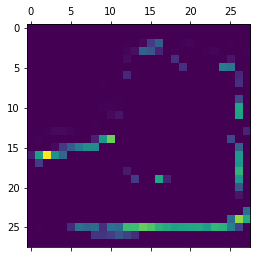

In [0]:
img_tensor = image.img_to_array(train_images[0])
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor = img_tensor.astype(np.float32) / 255.0
print(img_tensor.shape)
layer_outputs = [layer.output for layer in model.layers[:9]] 
activation_model = models.Model(inputs=model.input, outputs=layer_outputs) 
activations = activation_model.predict(img_tensor)
first_layer_activation = activations[0]
print(first_layer_activation.shape)
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


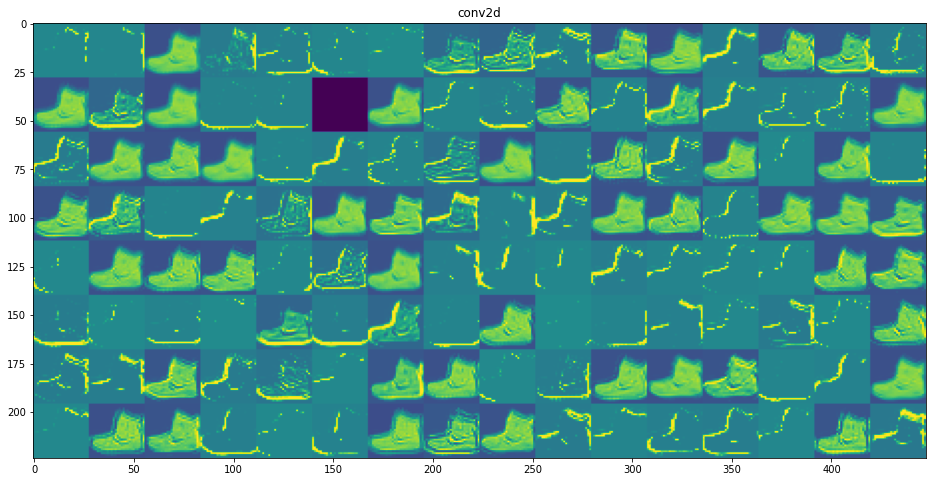

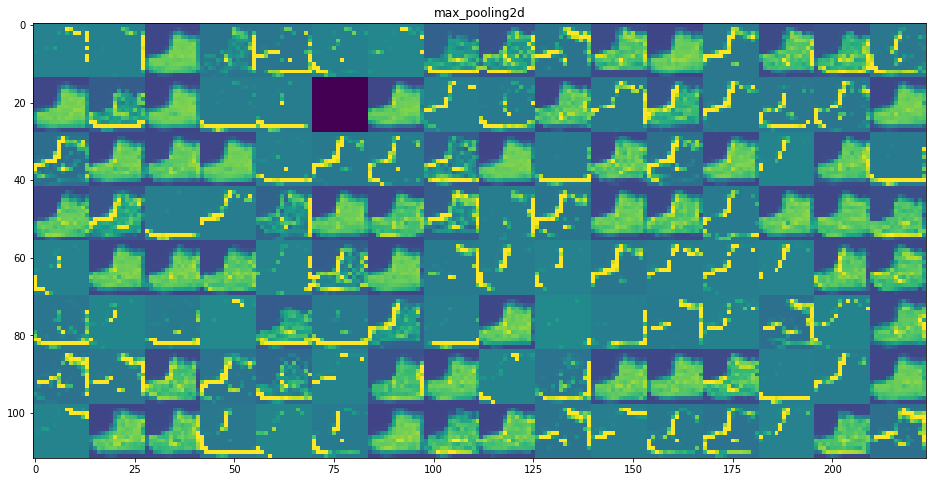

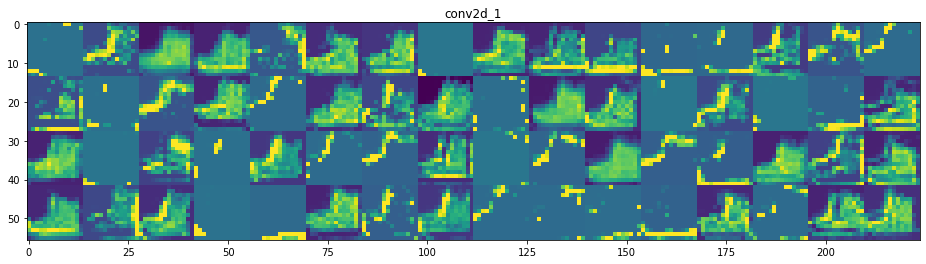

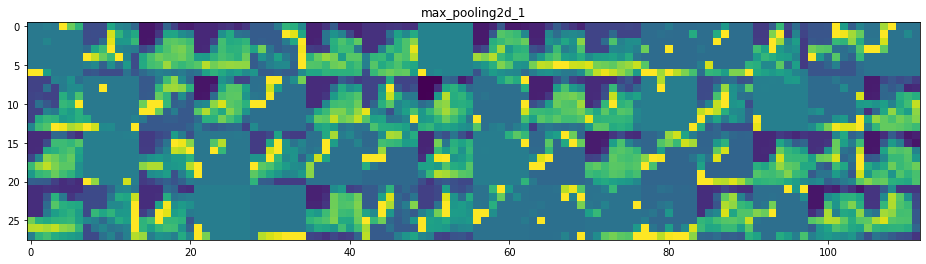

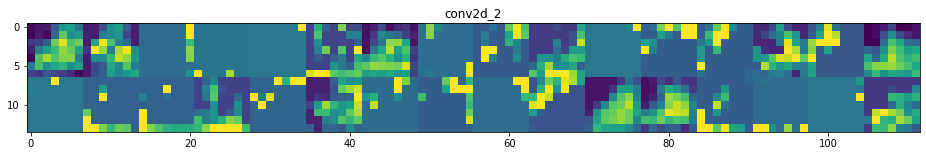

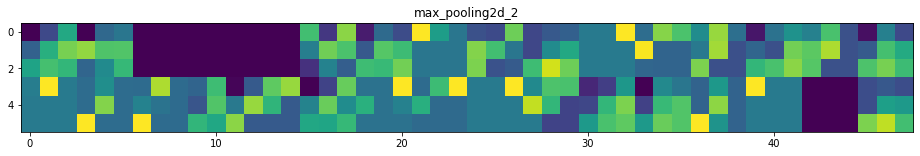

In [0]:
layer_names = []
for layer in model.layers[:6]:
    layer_names.append(layer.name) 
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations): 
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,:, :,col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')


# **Trying out Resnet type architecture for CIFAR-10**

Summary: Eventhough three layers of resnets block was coded in it seems that accuracy is not going above 15%.

Maybe it needs more blocks(>10) to get its accuracy up


In [0]:
mnist = tf.keras.datasets.cifar10
(train_images_raw, train_labels_raw), (test_images_raw, test_labels_raw) = mnist.load_data()

170500096/170498071 [==============================] - 6s 0us/step


(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)
[6]
[3]


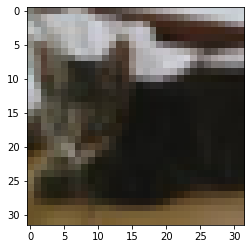

In [0]:
print(train_images_raw.shape)
print(train_labels_raw.shape)
print(test_images_raw.shape)
print(test_labels_raw.shape)
print(train_labels_raw[0])
plt.imshow(train_images_raw[9], cmap="Greys_r")
print(train_labels_raw[9])

In [0]:
train_data = tf.data.Dataset.from_tensor_slices(( train_images_raw.astype(np.float32)/255.0, train_labels_raw.astype(np.int32) ))

train_data = train_data.shuffle(buffer_size = train_images_raw.shape[0]).batch(512).repeat(2)

test_data = tf.data.Dataset.from_tensor_slices(( test_images_raw.astype(np.float32)/255.0, test_labels_raw.astype(np.int32) ))

test_data = test_data.batch(512)

In [0]:
input_shape = (train_images_raw.shape[1], train_images_raw.shape[2], train_images_raw.shape[3])
print(input_shape)

(32, 32, 3)


In [0]:
# Instantiate an optimizer.
optimizer = keras.optimizers.Adam(learning_rate=   1.1 * 1e-3)
# Instantiate a loss function.
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Prepare the metrics.
train_acc_metric = keras.metrics.SparseCategoricalAccuracy()
val_acc_metric = keras.metrics.SparseCategoricalAccuracy()

In [0]:

# Get the model.
inputs = keras.Input(shape = input_shape, name='cifar')
# x = layers.Conv2D(filters = 64, kernel_size=(1, 1), padding = "same", activation=tf.nn.relu, name = "conv_preprocess") (inputs)
x = layers.Conv2D(filters=64, kernel_size=(3, 3), padding = "same", activation = tf.nn.relu, use_bias=True, kernel_initializer = initializers.he_normal(seed=0), bias_initializer = initializers.glorot_uniform(seed=0), name = "conv_1" ) (inputs)
# x = layers.AveragePooling2D(pool_size=(2,2)) (x)

# first resnet block r1
x_shortcut_r1 = x
x_r1 = layers.Conv2D(filters=64, kernel_size=(3, 3), padding = "same", activation = tf.nn.relu, use_bias=True, kernel_initializer= initializers.he_normal(seed=0), bias_initializer= initializers.glorot_uniform(seed=0), name = "conv_res1a") (x)
x_r1 = layers.BatchNormalization(axis = 3, name = 'r1a')(x_r1)
x_r1 = layers.Conv2D(filters=64, kernel_size=(3, 3), padding = "same", use_bias=True, kernel_initializer= initializers.he_normal(seed=0), bias_initializer= initializers.glorot_uniform(seed=0), name = "conv_res1b") (x_r1)
x_r1 = layers.BatchNormalization(axis = 3, name = 'r1b')(x_r1)

x_r1_add = layers.Add()([x_r1, x_shortcut_r1])
x_r1_out = layers.Activation("relu") (x_r1_add)

# Second resnet block r2
x_shortcut_r2 = x_r1_out
x_r2 = layers.Conv2D(filters=64, kernel_size=(3, 3), padding = "same", activation = tf.nn.relu, use_bias=True, kernel_initializer= initializers.he_normal(seed=0), bias_initializer= initializers.glorot_uniform(seed=0), name = "conv_res2a") (x_r1_out)
x_r2 = layers.BatchNormalization(axis = 3, name = 'r2a')(x_r2)
x_r2 = layers.Conv2D(filters=64, kernel_size=(3, 3), padding = "same", use_bias=True, kernel_initializer= initializers.he_normal(seed=0), bias_initializer= initializers.glorot_uniform(seed=0), name = "conv_res2b") (x_r2)
x_r2 = layers.BatchNormalization(axis = 3, name = 'r2b')(x_r2)

x_r2_add = layers.Add()([x_r2, x_shortcut_r2])
x_r2_out = layers.Activation("relu") (x_r2_add)

# Using Average pool after 2 resnet blocks
# x_r2_out = layers.MaxPool2D(pool_size = (2, 2)) (x_r2_out)

# third resnet block r3
x_shortcut_r3 = x_r2_out
x_r3 = layers.Conv2D(filters=64, kernel_size=(3, 3), padding = "same", activation = tf.nn.relu, use_bias=True, kernel_initializer= initializers.he_normal(seed=0), bias_initializer= initializers.glorot_uniform(seed=0), name = "conv_res3a") (x_r2_out)
x_r3 = layers.BatchNormalization(axis = 3, name ='r3a')(x_r3)
x_r3 = layers.Conv2D(filters=64, kernel_size=(3, 3), padding = "same", use_bias=True, kernel_initializer= initializers.he_normal(seed=0), bias_initializer= initializers.glorot_uniform(seed=0), name = "conv_res3b") (x_r3)
x_r3 = layers.BatchNormalization(axis = 3, name =  'r3b')(x_r3)

x_r3_add = layers.Add()([x_r3, x_shortcut_r3])
x_r3_out = layers.Activation("relu") (x_r3_add)

# reduce dmensionality
x_r3_out = layers.MaxPool2D(pool_size=(2,2)) (x_r3_out)
x_reduce_dim = layers.Conv2D(filters=64, kernel_size=(1, 1), padding = "valid", activation = tf.nn.relu, use_bias=True, kernel_initializer= initializers.he_normal(seed=0), bias_initializer= initializers.glorot_uniform(seed=0), name = "conv_res4") (x_r3_out)

x_reduce_dim = layers.Flatten() (x_reduce_dim)

# Flatten and give to fully connected dense layer
x_dense_1 = layers.Dense(256, activation='relu', name='dense_1')(x_reduce_dim)
x_dense_2 = layers.Dense(64, activation='relu', name='dense_2')(x_dense_1)
outputs = layers.Dense(10, name='predictions')(x_dense_2)
model = keras.Model(inputs=inputs, outputs=outputs)

In [0]:
model.summary()

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
cifar (InputLayer)              [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv_1 (Conv2D)                 (None, 32, 32, 64)   1792        cifar[0][0]                      
__________________________________________________________________________________________________
conv_res1a (Conv2D)             (None, 32, 32, 64)   36928       conv_1[0][0]                     
__________________________________________________________________________________________________
r1a (BatchNormalization)        (None, 32, 32, 64)   256         conv_res1a[0][0]                 
____________________________________________________________________________________________

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

In [0]:
train_features = train_images_raw.astype(np.float32)/255.0 
train_labels = train_labels_raw.astype(np.int32)

train_labels = convert_to_one_hot(train_labels, 10).T
test_labels = convert_to_one_hot(test_labels_raw, 10).T
print(np.shape(train_labels))
print(np.shape(train_features))
print(train_labels[0:3,:])
print(train_features[0:1,:])

(50000, 10)
(50000, 32, 32, 3)
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
[[[[0.23137255 0.24313726 0.24705882]
   [0.16862746 0.18039216 0.1764706 ]
   [0.19607843 0.1882353  0.16862746]
   ...
   [0.61960787 0.5176471  0.42352942]
   [0.59607846 0.49019608 0.4       ]
   [0.5803922  0.4862745  0.40392157]]

  [[0.0627451  0.07843138 0.07843138]
   [0.         0.         0.        ]
   [0.07058824 0.03137255 0.        ]
   ...
   [0.48235294 0.34509805 0.21568628]
   [0.46666667 0.3254902  0.19607843]
   [0.47843137 0.34117648 0.22352941]]

  [[0.09803922 0.09411765 0.08235294]
   [0.0627451  0.02745098 0.        ]
   [0.19215687 0.10588235 0.03137255]
   ...
   [0.4627451  0.32941177 0.19607843]
   [0.47058824 0.32941177 0.19607843]
   [0.42745098 0.28627452 0.16470589]]

  ...

  [[0.8156863  0.6666667  0.3764706 ]
   [0.7882353  0.6        0.13333334]
   [0.7764706  0.6313726  0.10196079]
   ...
   [0.627451   0.52156866 0.27

In [0]:
model.fit(train_features, train_labels, epochs = 5, batch_size = 64)

Epoch 1/5
782/782 [==============================] - 50s 64ms/step - loss: 6.5240 - accuracy: 0.0962
Epoch 2/5
782/782 [==============================] - 51s 65ms/step - loss: 6.4585 - accuracy: 0.0962
Epoch 3/5
782/782 [==============================] - 51s 65ms/step - loss: 6.4556 - accuracy: 0.0962
Epoch 4/5
782/782 [==============================] - 50s 64ms/step - loss: 6.4582 - accuracy: 0.0960
Epoch 5/5
782/782 [==============================] - 50s 64ms/step - loss: 6.4585 - accuracy: 0.0961


In [0]:
"""
preds = model.evaluate(X_test, Y_test)
print (“Loss = “ + str(preds[0]))
print (“Test Accuracy = “ + str(preds[1]))
"""

'\npreds = model.evaluate(X_test, Y_test)\nprint (“Loss = “ + str(preds[0]))\nprint (“Test Accuracy = “ + str(preds[1]))\n'